In [1]:
#Der Stromverbrauch verteilte sich 2023 wie folgt: Industrie: 40,0 %, Private Haushalte: 28,0 %, 
#Kleinverbraucher – hierzu zählen Handel, Gewerbe, Dienstleistungen sowie öffentliche Einrichtungen: 26,7 % und Verkehr: 3,3 %
#(QUELLE : https://www.weltenergierat.de/energie-fuer-deutschland-2024/energie-in-deutschland-zahlen-und-fakten)
# it has been tried to divide the share of the load input data in this thesis base on the real share of the total load in germany in the year 2023.


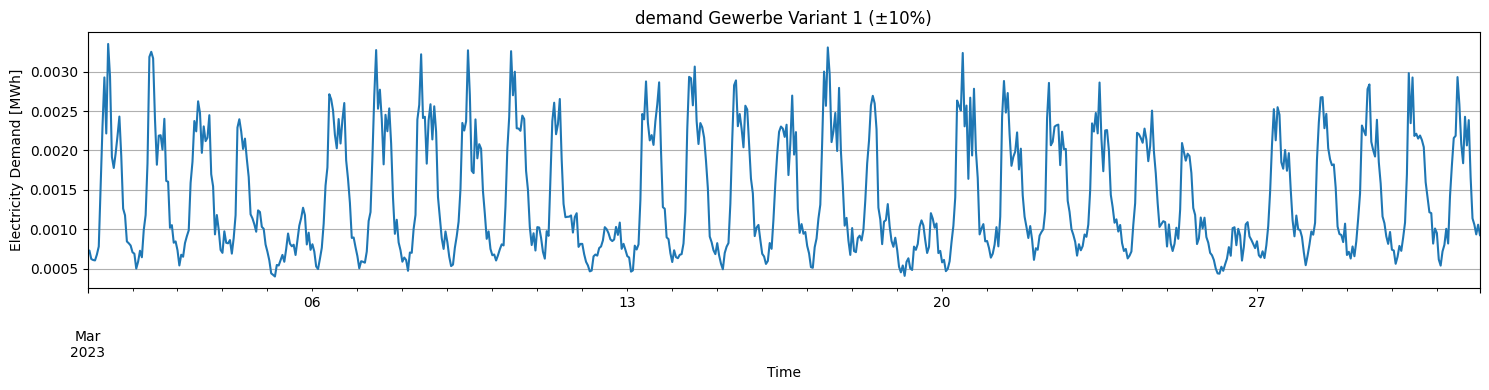

,tot_demand_Gewerbe_variants_[MWh]
2023-03-01 00:00:00,0.008947
2023-03-01 01:00:00,0.007373
2023-03-01 02:00:00,0.006833
2023-03-01 03:00:00,0.007078
2023-03-01 04:00:00,0.008424
...,...
2023-03-31 19:00:00,0.013780
2023-03-31 20:00:00,0.012600
2023-03-31 21:00:00,0.011896
2023-03-31 22:00:00,0.011621


In [2]:
from demandlib.bdew import ElecSlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 # aggregated 12 general businesses with annual power consumption of 12000(+- 20% deviation from standard last profile for each obtained from SLP published by BDEW)
# source : https://demandlib.readthedocs.io/
e_slp = ElecSlp(year=2023)  
g0_annual = 12000

profile_g0 = e_slp.get_scaled_profiles({"g0": g0_annual})

demand_Gewerbe = profile_g0["g0"].resample("1h").sum()
demand_Gewerbe = demand_Gewerbe["2023-03-01":"2023-03-31"] / 1000
demand_Gewerbe= demand_Gewerbe.to_frame(name="Demand [MWh]")
#display(demand_Gewerbe.sum())

np.random.seed(42)

#  Generate 12 varied profiles
gewerbe_variants_profiles = []

for i in range(12):
    variation = np.random.uniform(0.8, 1.2, size=len(demand_Gewerbe))
    modified_values = demand_Gewerbe["Demand [MWh]"].values * variation
    
    df_variant = pd.DataFrame(modified_values, index=demand_Gewerbe.index, columns=[f"demand_Gewerbe_{i+1}_[MWh]"])
    
    gewerbe_variants_profiles.append(df_variant)

all_gewerbe_variants = pd.concat(gewerbe_variants_profiles, axis=1)

all_gewerbe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Gewerbe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Gewerbe = all_gewerbe_variants.sum(axis=1).to_frame(name="tot_demand_Gewerbe_variants_[MWh]")
display(tot_Gewerbe)
#all_gewerbe_variants.head(5)

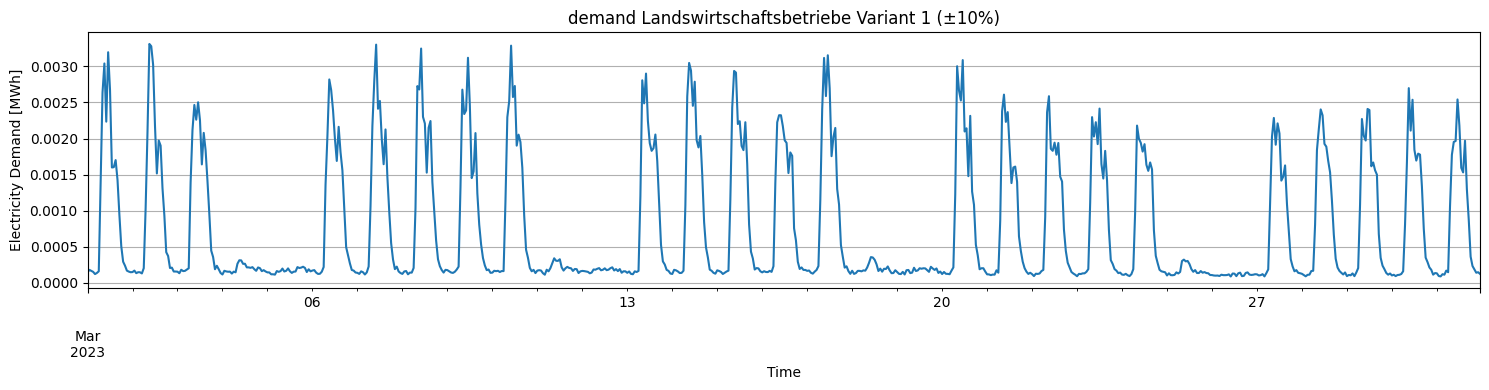

,tot_demand_Landswirtschaftsbetriebe_variants_[MWh]
2023-03-01 00:00:00,0.001588
2023-03-01 01:00:00,0.001561
2023-03-01 02:00:00,0.001568
2023-03-01 03:00:00,0.001444
2023-03-01 04:00:00,0.001425
...,...
2023-03-31 19:00:00,0.002345
2023-03-31 20:00:00,0.001904
2023-03-31 21:00:00,0.001500
2023-03-31 22:00:00,0.001370


In [3]:
from demandlib.bdew import ElecSlp
import pandas as pd
# aggregated 10 "Business on weekdays 8 a.m. - 6 p.m." with annual power consumption of 6000(+- 20% deviation from standard last profile for each, obtained from SLP published by BDEW)                        
e_slp = ElecSlp(year=2023)  
g1_annual = 6000

profile_g1 = e_slp.get_scaled_profiles({"g1": g1_annual})

demand_Landswirtschaftsbetriebe = profile_g1["g1"].resample("1h").sum()
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe["2023-03-01":"2023-03-31"] / 1000
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe.to_frame(name="Demand [MWh]")
#demand_Landswirtschaftsbetriebe


np.random.seed(42)

#  Generate 12 varied profiles
Landswirtschaftsbetriebe_variants_profiles = []

for i in range(10):
    variation2 = np.random.uniform(0.8, 1.2, size=len(demand_Landswirtschaftsbetriebe))
    modified_values2 = demand_Landswirtschaftsbetriebe["Demand [MWh]"].values * variation2
    
    df_variant2 = pd.DataFrame(modified_values2, index=demand_Landswirtschaftsbetriebe.index, columns=[f"demand_Landswirtschaftsbetriebe_{i+1}_[MWh]"])
    
    Landswirtschaftsbetriebe_variants_profiles.append(df_variant2)

all_Landswirtschaftsbetriebe_variants = pd.concat(Landswirtschaftsbetriebe_variants_profiles, axis=1)

all_Landswirtschaftsbetriebe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Landswirtschaftsbetriebe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Landswirtschaftsbetriebe = all_Landswirtschaftsbetriebe_variants.sum(axis=1).to_frame(name="tot_demand_Landswirtschaftsbetriebe_variants_[MWh]")
display(tot_Landswirtschaftsbetriebe)
#all_Landswirtschaftsbetriebe_variants.head(5)

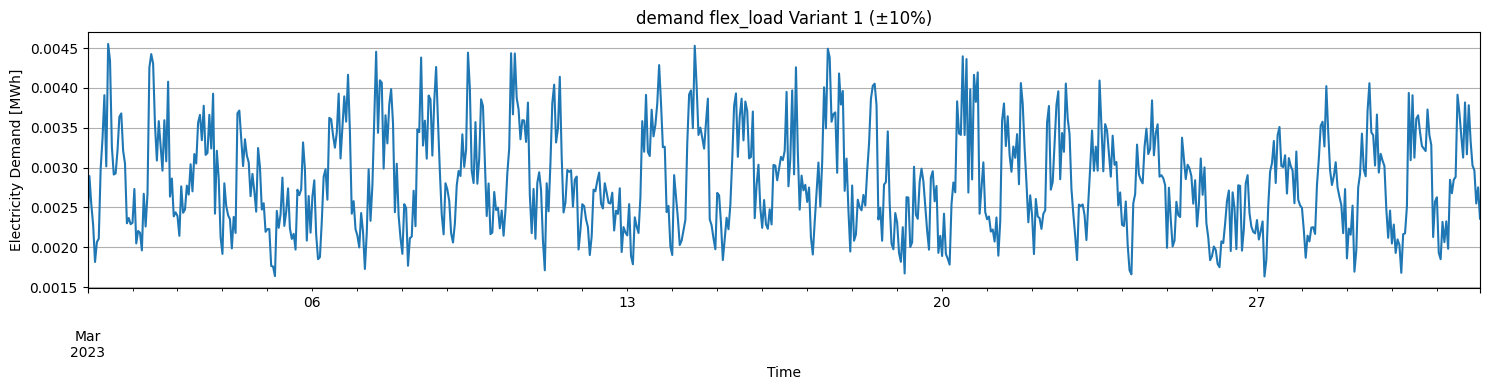

In [4]:
from demandlib.bdew import ElecSlp
import pandas as pd
# aggregated 14 "Continuous business" with annual power consumption of 12000(+- 20% deviation from standard last profile for each obtained from SLP published by BDEW)
e_slp = ElecSlp(year=2023)
g3_annual = 25000
profile_g3 = e_slp.get_scaled_profiles({"g3": g3_annual})   

demand_flex_load = profile_g3["g3"].resample("1h").sum()
demand_flex_load = demand_flex_load["2023-03-01":"2023-03-31"] / 1000
demand_flex_load = demand_flex_load.to_frame(name="Demand [MWh]")
#demand_flex_load

np.random.seed(42)

#  Generate 12 varied profiles
flex_load_variants_profiles = []

for i in range(14):
    variation3 = np.random.uniform(0.8, 1.2, size=len(demand_flex_load))
    modified_values3 = demand_flex_load["Demand [MWh]"].values * variation3
    
    df_variant3 = pd.DataFrame(modified_values3, index=demand_flex_load.index, columns=[f"demand_flex_load_{i+1}_[MWh]"])
    
    flex_load_variants_profiles.append(df_variant3)

all_flex_load_variants = pd.concat(flex_load_variants_profiles, axis=1)

all_flex_load_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand flex_load Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_flex_load = all_flex_load_variants.sum(axis=1).to_frame(name="tot_demand_flex_load_variants_[MWh]")
#display(tot_flex_load)
#all_flex_load_variants.head(5)

In [5]:
# 30 percent of the total load in the hours [10,11,12,13,14,15,16,17], in which there are the most power import from the grid(peak load hours  with higher electricity cost)
# are shifted to the hours [23,0,1,2,3,4,5,6], in which there are the less power import from the grid(low load hours with lower electricity cost)

index = pd.date_range("2023-03-01", "2023-03-31 23:00", freq="h")
shift_hours = [10,11,12,13,14,15,16,17]
df_shifted_load = pd.Series(0.0, index=index, name="tot_demand_flex_load_variants_[MWh]")
df_shifted_load.loc[df_shifted_load.index.hour.isin(shift_hours)] = (
    tot_flex_load["tot_demand_flex_load_variants_[MWh]"].loc[tot_flex_load.index.hour.isin(shift_hours)]*0.3
)
df_shifted_load = df_shifted_load.to_frame()

df_shifted_load_target = pd.Series(0.0, index=index, name="tot_demand_flex_load_variants_[MWh]")
shift_hours_target = [23,0,1,2,3,4,5,6]

for src, tgt in zip(shift_hours, shift_hours_target):
    src_times = df_shifted_load[df_shifted_load.index.hour == src].iloc[:, 0]
    shifted_times = src_times.index + pd.Timedelta(hours=(tgt - src) % 24)
    shifted_times = shifted_times[shifted_times <= df_shifted_load.index[-1]]
    df_shifted_load_target.loc[shifted_times] = src_times.values[:len(shifted_times)]
    
df_shifted_load_target = df_shifted_load_target.to_frame()

tot_flex_load_substracted =  tot_flex_load["tot_demand_flex_load_variants_[MWh]"]- df_shifted_load["tot_demand_flex_load_variants_[MWh]"]
tot_flex_load_substracted.name = "tot_demand_flex_load_variants_[MWh]"

tot_flex_load_substracted = tot_flex_load_substracted.to_frame()



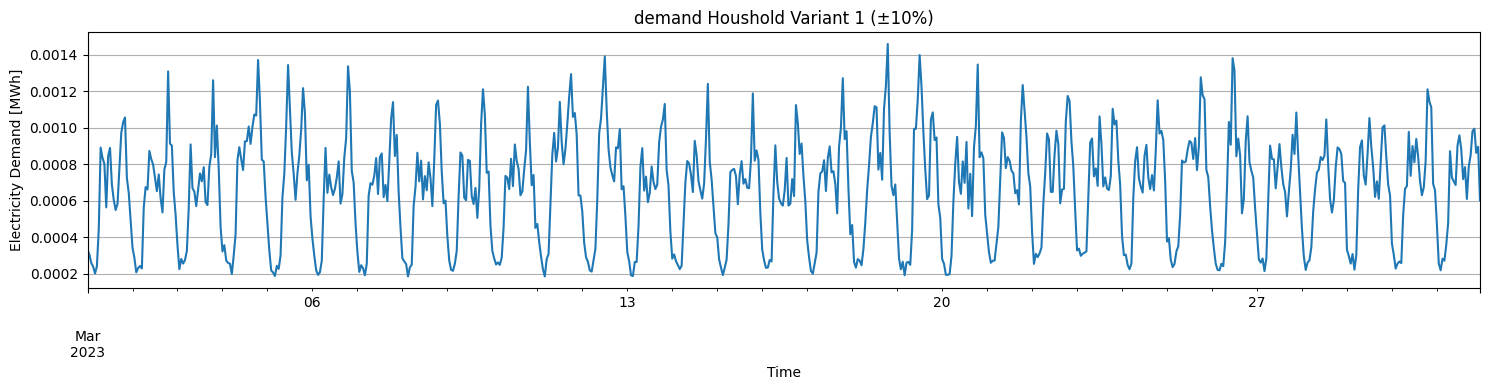

,tot_demand_Houshold_variants_[MWh]
2023-03-01 00:00:00,0.008843
2023-03-01 01:00:00,0.006443
2023-03-01 02:00:00,0.005966
2023-03-01 03:00:00,0.005805
2023-03-01 04:00:00,0.005831
...,...
2023-03-31 19:00:00,0.025631
2023-03-31 20:00:00,0.024456
2023-03-31 21:00:00,0.023249
2023-03-31 22:00:00,0.020712


In [6]:
from demandlib.bdew import ElecSlp
import pandas as pd
# aggregated 25 "household" with annual power consumption of 6000(+- 20% deviation from standard last profile for each obtained from SLP published by BDEW)

e_slp = ElecSlp(year=2023)
h0_annual = 6000
profile_h0 = e_slp.get_scaled_profiles({"h0": h0_annual})
demand_Houshold = profile_h0["h0"].resample("1h").sum()
demand_Houshold = demand_Houshold["2023-03-01":"2023-03-31"] / 1000
demand_Houshold = demand_Houshold.to_frame(name="Demand [MWh]")
#demand_Houshold

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_variants_profiles = []

for i in range(25):
    variation4 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold))
    modified_values4 = demand_Houshold["Demand [MWh]"].values * variation4
    
    df_variant4 = pd.DataFrame(modified_values4, index=demand_Houshold.index, columns=[f"demand_Houshold_{i+1}_[MWh]"])
    
    Houshold_variants_profiles.append(df_variant4)

all_Houshold_variants = pd.concat(Houshold_variants_profiles, axis=1)

all_Houshold_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold = all_Houshold_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_variants_[MWh]")
display(tot_Houshold)
#all_Houshold_variants.head(5)


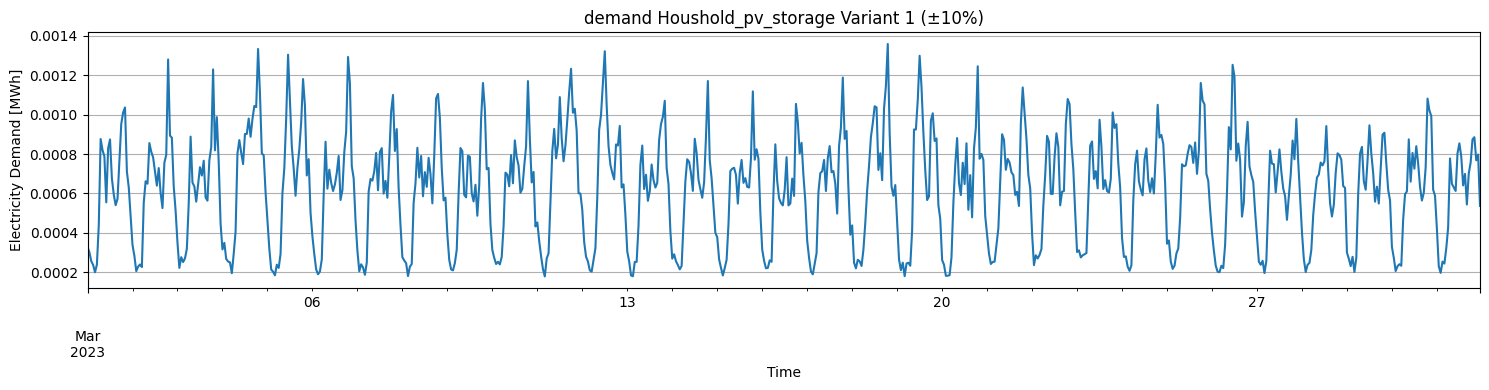

,tot_demand_Houshold_pv_storage_variants_[MWh]
2023-03-01 00:00:00,0.006949
2023-03-01 01:00:00,0.005094
2023-03-01 02:00:00,0.004668
2023-03-01 03:00:00,0.004521
2023-03-01 04:00:00,0.004555
...,...
2023-03-31 19:00:00,0.017808
2023-03-31 20:00:00,0.017515
2023-03-31 21:00:00,0.016515
2023-03-31 22:00:00,0.014665


In [7]:
from demandlib.bdew import ElecSlp
import pandas as pd
# aggregated 20 "dynamic houshold with PV and Storage" with annual power consumption of 5000(+- 20% deviation from standard last profile for each obtained from SLP published by BDEW)

e_slp = ElecSlp(year=2023)
h0_dyn_annual = 5000
profile_h0_dyn = e_slp.get_scaled_profiles({"h0_dyn": h0_dyn_annual})
# rename and convert by hour
demand_Houshold_pv_storage = profile_h0_dyn["h0_dyn"].resample("1h").sum()
demand_Houshold_pv_storage = demand_Houshold_pv_storage["2023-03-01":"2023-03-31"] / 1000
demand_Houshold_pv_storage = demand_Houshold_pv_storage.to_frame(name="Demand [MWh]")
#demand_Houshold_pv_storage

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_pv_storage_variants_profiles = []

for i in range(20):
    variation5 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold_pv_storage))
    modified_values5 = demand_Houshold_pv_storage["Demand [MWh]"].values * variation5
    
    df_variant5 = pd.DataFrame(modified_values5, index=demand_Houshold_pv_storage.index, columns=[f"demand_Houshold_pv_storage_{i+1}_[MWh]"])
    
    Houshold_pv_storage_variants_profiles.append(df_variant5)

all_Houshold_pv_storage_variants = pd.concat(Houshold_pv_storage_variants_profiles, axis=1)

all_Houshold_pv_storage_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold_pv_storage Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold_pv_storage = all_Houshold_pv_storage_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_pv_storage_variants_[MWh]")
display(tot_Houshold_pv_storage)

#all_Houshold_pv_storage_variants.head(5)

# total demands

In [8]:
tot_demand = tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"] + tot_Houshold["tot_demand_Houshold_variants_[MWh]"] + tot_flex_load_substracted["tot_demand_flex_load_variants_[MWh]"] + df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"]+ tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"]+ tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"]
tot_demand = tot_demand.to_frame(name="Demand [MWh]")
tot_demand

,Demand [MWh]
2023-03-01 00:00:00,0.059680
2023-03-01 01:00:00,0.054700
2023-03-01 02:00:00,0.051388
2023-03-01 03:00:00,0.049474
2023-03-01 04:00:00,0.049793
...,...
2023-03-31 19:00:00,0.102545
2023-03-31 20:00:00,0.097726
2023-03-31 21:00:00,0.091198
2023-03-31 22:00:00,0.083970


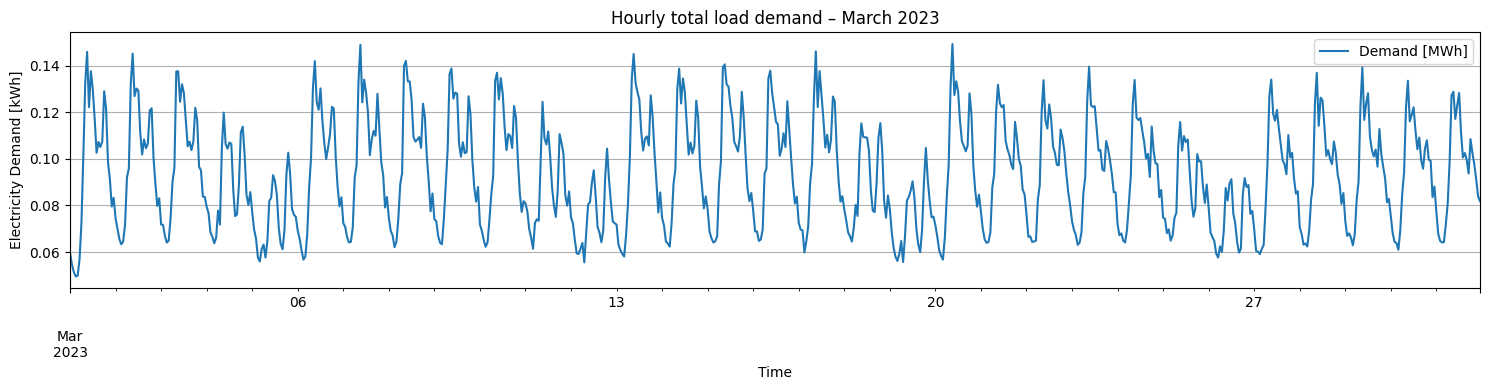

In [9]:
plt.figure(figsize=(15, 4))
tot_demand["Demand [MWh]"].plot(legend=True)
plt.title("Hourly total load demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import pypsa
import pandas as pd
# building the Network in hourly resolution in the March 2023
net = pypsa.Network()

net.set_snapshots(pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h"))

# Buses

In [11]:
# Grid bus and generator
net.add("Bus", "grid")
net.add("Bus","solar_bus")
net.add("Bus","demand_Gewerbe")
net.add("Bus","houshold")
net.add("Bus","houshold_pv_storage")
net.add("Bus","Landswirtschaftsbetriebe")
net.add("Bus", "battery_bus")
net.add("Bus","flex_load")
net.add("Bus","Biomass")
net.add("Bus","DSM")


Index(['DSM'], dtype='object')

In [12]:
#solar generation data is retrieved from PVGIS published by European commission with this properties for march 2023 in hourly resolution:

#"Latitude (decimal degrees):	52.481"				
#"Longitude (decimal degrees):	13.393"				
#"Elevation (m):	51"				
#"Radiation database:	PVGIS-SARAH3"				
#Slope: 40 deg. (optimum)				
#Azimuth: -7 deg. (optimum)				
#"Nominal power of the PV system (CdTe) (kWp):	400.0"				
#System losses (%):	14.0"				

solar_gen = pd.read_csv("solar_simulated_march_2023.csv", header=None, names=["power[W]"])
solar_gen = solar_gen / 1000000
solar_gen.index = net.snapshots
solar_gen.head(20)


,power[W]
snapshot,
2023-03-01 00:00:00,0.000000
2023-03-01 01:00:00,0.000000
2023-03-01 02:00:00,0.000000
2023-03-01 03:00:00,0.000000
2023-03-01 04:00:00,0.000000
2023-03-01 05:00:00,0.000000
2023-03-01 06:00:00,0.000000
2023-03-01 07:00:00,0.102680
2023-03-01 08:00:00,0.199752


In [13]:
tot_Houshold_pv_storage.index = net.snapshots
tot_Houshold.index = net.snapshots
tot_flex_load_substracted.index = net.snapshots
df_shifted_load.index = net.snapshots
df_shifted_load_target.index = net.snapshots
tot_Landswirtschaftsbetriebe.index = net.snapshots
tot_Gewerbe.index = net.snapshots
tot_demand.index = net.snapshots

# Electricity price

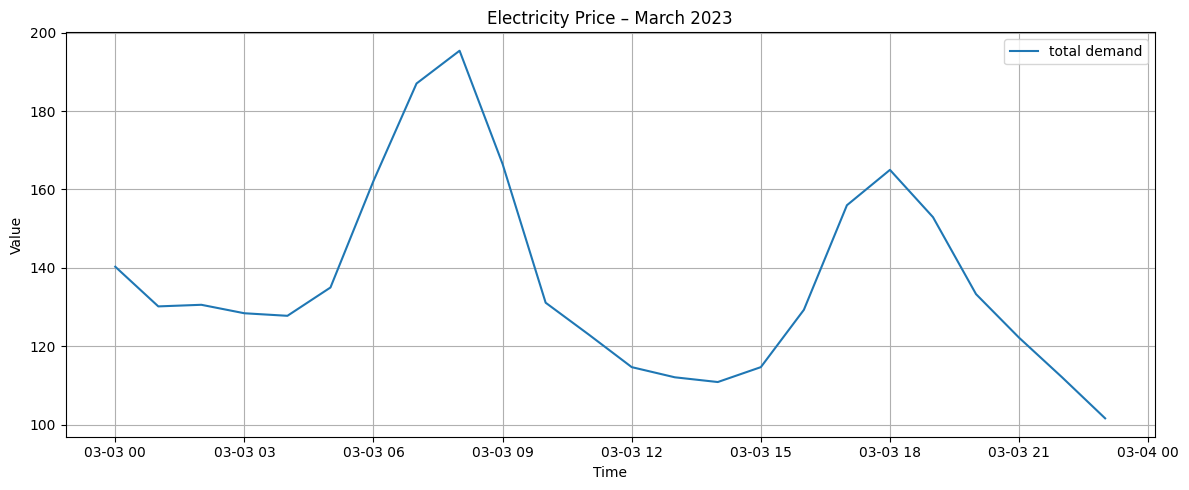

E_price    102.518454
dtype: float64

In [14]:
# the wholesale market clearing electricity price in march 2023 are used as marginal cost of the "grid_generator" to simulate the cost of the imported power to the designed model 
# the source of wholesale electricity price : https://www.epexspot.com/en/marketdataservices

Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1

start="2023-03-03 00:00:00"
end = "2023-03-03 23:00:00"    
plt.figure(figsize=(12, 5))
plt.plot(tou_price.loc[start:end],  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.mean()

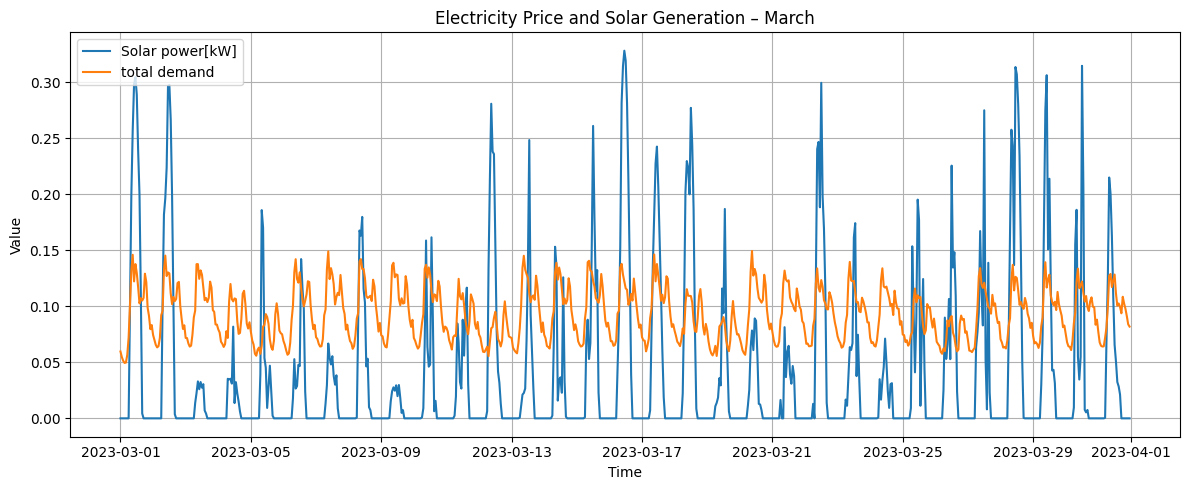

In [15]:
plt.figure(figsize=(12, 5))
plt.plot( solar_gen["power[W]"], label="Solar power[kW]")
plt.plot(tot_demand["Demand [MWh]"],  label="total demand")

plt.title("Electricity Price and Solar Generation – March")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
df_diff = tot_demand["Demand [MWh]"]-  solar_gen["power[W]"]
display(df_diff.max())
display(df_diff.min())

0.12912038153346622

-0.20580056044416398

# All generators

In [17]:
# 3 generators are used in this model; solar with 400 kwp capacity, Biomass generator as base-load generator with rated power of 60 kw, and grid generator

net.add("Generator", "grid_generator",
        bus="grid", p_nom=1e6,
        marginal_cost=tou_price["E_price"],
        capital_cost=0)

net.add("Generator", "solar",
        bus="solar_bus",
        p_nom=1,
        p_max_pu= solar_gen["power[W]"],
        marginal_cost= 0)   #*tou_price["E_price"])

net.add("Generator", "Biomass",    # source: https://www.drax.com/opinion/the-role-of-biomass-in-securing-reliable-power-generation/#:~:text=globally
         bus="Biomass", p_nom=0.06,   # find a source how much percent should be based load covering
         marginal_cost= 0.05)  #*tou_price["E_price"],  # source : zotero: biomass price


Index(['Biomass'], dtype='object')

# Loads (g0,g1,H0...)

In [18]:
net.add("Load","demand_Gewerbe",
        bus="demand_Gewerbe",
        p_set=tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"])

net.add("Load","demand_houshold",
        bus="houshold",
        p_set=tot_Houshold["tot_demand_Houshold_variants_[MWh]"])

net.add("Load","demand_houshold_pv_storage",
        bus="houshold_pv_storage",
        p_set=tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"])

net.add("Load","demand_Landswirtschaftsbetriebe",
        bus="Landswirtschaftsbetriebe",
        p_set=tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"])

net.add("Load","demand_flex_load",
        bus="flex_load",
        p_set=tot_flex_load_substracted["tot_demand_flex_load_variants_[MWh]"])

net.add("Load","demand_shifted_load",
        bus="DSM",
        p_set=df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"])


Index(['demand_shifted_load'], dtype='object')

# Central Battery Energy Storage System

In [19]:
# A BESS is simulated as a buffer with 200Kwh capacity and 100 kw charging and discharging rated power.
net.add("Store", "battery_storage",
        bus="battery_bus",
        e_nom=0.20,           
        e_initial=0,       
        e_cyclic=True)

Index(['battery_storage'], dtype='object')

In [20]:
df_shifted_load_target.max()

tot_demand_flex_load_variants_[MWh]    0.017034
dtype: float64

# Battery DSM

In [21]:
net.add("Store","Store DSM",
            bus="DSM",
            e_nom= 1 ,
            e_initial=0,
            marginal_cost=0,
            e_cyclic=True)

Index(['Store DSM'], dtype='object')

# Links from GRID to LOADS

In [22]:
# total amount of Netzentgelt, weitere Abgaben und umlagen is considered here 200 euro per MWh as the link marginal costs to reflect the realistic electricity costs that costumers must pay(market clearing price+Netzentgelt+Steuern+ weitere Abgaben und Umlagen)
# the average amount of these levies on first of April 2023 was 216 euro per MWh(source:https://www.bundesnetzagentur.de/DE/Vportal/Energie/PreiseAbschlaege/start.html)
# the capacity of the public transmittion line is big enough (10 MW)
net.add("Link", "to_gewerbe",bus0="grid", bus1="demand_Gewerbe",p_nom=10, marginal_cost=200)
net.add("Link", "to_houshold",bus0="grid", bus1="houshold",p_nom=10, marginal_cost=200)
net.add("Link", "to_houshold_pv_storage",bus0="grid", bus1="houshold_pv_storage",p_nom=10, marginal_cost=200)
net.add("Link", "to_Landswirtschaftsbetriebe",bus0="grid", bus1="Landswirtschaftsbetriebe",p_nom=10, marginal_cost=200)
net.add("Link", "to_flex_load",bus0="grid", bus1="flex_load",p_nom=10, marginal_cost=200)
net.add("Link", "to_shifted_load",bus0="grid", bus1="DSM",p_nom=0.05, marginal_cost=200)


Index(['to_shifted_load'], dtype='object')

# Links from SOLAR to LOADS

In [23]:
# the total Netzentgelt, weitere Abgaben und umlagen inside the simulated market model is considered here 100 euro per MWh from solar to the loads(the half of public transmittion line) as the link marginal costs
# links capacities are 400 kw, because the rated power of the solar in 400 kw, in order to carry the propable rated solar power.
net.add("Link", "solar_to_gewerbe", bus0="solar_bus", bus1="demand_Gewerbe", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_houshold", bus0="solar_bus", bus1="houshold", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_pvhouse", bus0="solar_bus", bus1="houshold_pv_storage", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_landwirtschaft", bus0="solar_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_flex_load", bus0="solar_bus", bus1="flex_load", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_shifted_load", bus0="solar_bus", bus1="DSM", p_nom=0.05, marginal_cost=100)

Index(['solar_to_shifted_load'], dtype='object')

# Links from BIOMASS to the LOADS

In [24]:
# the total Netzentgelt, weitere Abgaben und umlagen inside the simulated market model is considered here 100 euro per MWh from biomass generator to the loads(the half of public transmittion line) as the link marginal costs
# links capacities are 60 kw, because the rated power of the Biomas generator is 60 kw, in order to carry the propable rated biomass power.


net.add("Link", "Biomass_to_gewerbe", bus0="Biomass", bus1="demand_Gewerbe", p_nom=0.06, marginal_cost=100)
net.add("Link", "Biomass_to_houshold", bus0="Biomass", bus1="houshold", p_nom=0.06, marginal_cost=100)
net.add("Link", "Biomass_to_pvhouse", bus0="Biomass", bus1="houshold_pv_storage", p_nom=0.6, marginal_cost=100)
net.add("Link", "Biomass_to_landwirtschaft", bus0="Biomass", bus1="Landswirtschaftsbetriebe", p_nom=0.6, marginal_cost=100)
net.add("Link", "Biomass_to_flex_load", bus0="Biomass", bus1="flex_load", p_nom=0.6, marginal_cost=100)
net.add("Link", "Biomass_to_shifted_load", bus0="Biomass", bus1="DSM", p_nom=0.05, marginal_cost=100)

Index(['Biomass_to_shifted_load'], dtype='object')

# Links from Solar to BESS, BESS to the LOADS

In [25]:
net.add("Link", "battery_charge",bus0="solar_bus", bus1="battery_bus", p_nom=0.1, efficiency=1, marginal_cost=100.01, committable=False)

net.add("Link", "BESS_to_gewerbe", bus0="battery_bus", bus1="demand_Gewerbe", p_nom=0.1, marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_houshold", bus0="battery_bus", bus1="houshold", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_pvhouse", bus0="battery_bus", bus1="houshold_pv_storage", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_landwirtschaft", bus0="battery_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.1 , marginal_cost=100.03, committable=False)
net.add("Link", "BESS_to_flex_load", bus0="battery_bus", bus1="flex_load", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_shifted_load", bus0="battery_bus", bus1="DSM", p_nom=0.1 , marginal_cost=100.03 , committable=False)

Index(['BESS_to_shifted_load'], dtype='object')

In [26]:
#df_EVs = pd.read_csv("charging_plan_generated_by _python.csv", index_col=0, parse_dates=True)
#df_EVs.index = net.snapshots
#df_EVs

# tesla model 3 RWD 2022 : Battery capacity = 62 kwh         14.4 kwh / 100 km
# vw id3 pro :  Battery capacity = 58 kWh         15.6 kwh / 100 km
# vw id7 :  Battery capacity = 77 kW·h       14.1 kwh / 100 km
# BMW i4 M50 :   Bttery capacity =  83.9 kwh   22.5 kwh/ 100 km
# Benz EQE 300 :   Bttery capacity = 89 kwh   16.4 kwh/ 100 km


# EVs buses

In [27]:
charging_profiles = pd.read_csv("charging_profiles.csv", index_col=0, parse_dates=True)
driving_profiles = pd.read_csv("driving_profiles_2.csv", index_col=0, parse_dates=True)
availability_profiles = pd.read_csv("availability_profiles_3.csv", index_col=0, parse_dates=True)
battery_df = pd.read_csv("battery_df.csv", index_col=0)

assert (charging_profiles.index == driving_profiles.index).all()
assert (charging_profiles.index == availability_profiles.index).all()
assert set(charging_profiles.columns) <= set(battery_df.index)


net.set_snapshots(charging_profiles.index)

#net.links_t.p_max_pu = pd.DataFrame(index=charging_profiles.index)
net.links_t.p_max_pu = pd.DataFrame(1.0, index=charging_profiles.index, columns=[])

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    
    ev_bus = f"{ev_id}_bus"
    link_name = f"{ev_id}_charge"
    Link_name = f"{ev_id}_Charge"
    LInk_name = f"{ev_id}_CHarge"
    load_name = f"{ev_id}_load"
    store_name = f"{ev_id}_store"

    availability = availability_profiles[ev_name]

    

    net.add("Bus", ev_bus)

    net.add("Store", store_name,
            bus=ev_bus,
            e_nom = battery_df.loc[ev_name, "e_nom_MWh"],
            e_initial = battery_df.loc[ev_name, "e_initial_MWh"],
            e_cyclic=False,
            marginal_cost=0)

    net.add("Link", link_name,
            bus0="grid",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=200,
            committable=False)
    
    net.add("Link", Link_name,
            bus0="solar_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Link", LInk_name,
            bus0="battery_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Load", load_name,
            bus=ev_bus,
            p_set=driving_profiles[ev_name])
    
    net.links_t.p_max_pu[Link_name] = availability
    net.links_t.p_max_pu[link_name] = availability
    net.links_t.p_max_pu[LInk_name] = availability


In [28]:

'''ev_power = 13 / 1000
initial_energy = 25 / 1000
roundtrip_eff = 0.95



for i in range(20):
    ev_name = f"EV{i+1}"                                                                                                           
    ev_bus = f"ev{i+1}_bus"
    
    profile_index = (i % 5) + 1
    consumption_col = f"power_consumption{profile_index}_kW"
    availability_col = f"availability{profile_index}"
    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"

    consumption_series = df_EVs[consumption_col]
    availability_series = df_EVs[availability_col]
    Battery_capacity_series = df_EVs[Battery_capacity_col]

    net.add("Bus", ev_bus)
    battery_capacity = Battery_capacity_series.iloc[0] / 1000
    net.add("Store", f"{ev_name}_store",
            bus=ev_bus,
            e_nom= battery_capacity,
            e_initial=initial_energy,
            marginal_cost=0,
            e_cyclic=False)

    net.add("Link", f"{ev_name}_charge",
            bus0="grid", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_Charge",
            bus0="solar_bus", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)

    net.add("Link", f"{ev_name}_CHarge",
            bus0="Biomass", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_discharge",
            bus0=ev_bus, bus1="grid",
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=-0.12*tou_price["E_price"],  #-132 should be based on a Paper
            committable=True)

    net.add("Load", f"{ev_name}_load",
            bus=ev_bus,
            p_set=consumption_series/1000)'''


'ev_power = 13 / 1000\ninitial_energy = 25 / 1000\nroundtrip_eff = 0.95\n\n\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"                                                                                                           \n    ev_bus = f"ev{i+1}_bus"\n    \n    profile_index = (i % 5) + 1\n    consumption_col = f"power_consumption{profile_index}_kW"\n    availability_col = f"availability{profile_index}"\n    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"\n\n    consumption_series = df_EVs[consumption_col]\n    availability_series = df_EVs[availability_col]\n    Battery_capacity_series = df_EVs[Battery_capacity_col]\n\n    net.add("Bus", ev_bus)\n    battery_capacity = Battery_capacity_series.iloc[0] / 1000\n    net.add("Store", f"{ev_name}_store",\n            bus=ev_bus,\n            e_nom= battery_capacity,\n            e_initial=initial_energy,\n            marginal_cost=0,\n            e_cyclic=False)\n\n    net.add("Link", f"{ev_name}_charge",\n           

# Create the model and add custom constraint to prevent simultanous charging and discharging

In [29]:
model = net.optimize.create_model()

'''link_dim = model.variables["Link-status"].dims[1]
store_dim = model.variables["Store-e"].dims[1]


for i in range(15):
    ev_name = f"EV{i+1}"
    profile_index = (i % 5) + 1
    availability_col = f"availability{profile_index}"
    availability = df_EVs[availability_col]  

    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})
    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")

for i in range(20):
    ev_name = f"EV{i+1}"
    profile_index2 = (i % 5) + 1
    availability_col2 = f"availability{profile_index2}"
    availability2 = df_EVs[availability_col2]  

    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})
    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})
    model.add_constraints(ch_grid + ch_solar + ch_biomass <= availability2, name=f"{ev_name}_xor")'''
    

Index(['to_gewerbe', 'to_houshold', 'to_houshold_pv_storage',
       'to_Landswirtschaftsbetriebe', 'to_flex_load', 'to_shifted_load',
       'solar_to_gewerbe', 'solar_to_houshold', 'solar_to_pvhouse',
       'solar_to_landwirtschaft', 'solar_to_flex_load',
       'solar_to_shifted_load', 'Biomass_to_gewerbe', 'Biomass_to_houshold',
       'Biomass_to_pvhouse', 'Biomass_to_landwirtschaft',
       'Biomass_to_flex_load', 'Biomass_to_shifted_load', 'battery_charge',
       'BESS_to_gewerbe', 'BESS_to_houshold', 'BESS_to_pvhouse',
       'BESS_to_landwirtschaft', 'BESS_to_flex_load', 'BESS_to_shifted_load',
       'tesla_model_3_1_charge', 'tesla_model_3_1_Charge',
       'tesla_model_3_1_CHarge', 'tesla_model_3_2_charge',
       'tesla_model_3_2_Charge', 'tesla_model_3_2_CHarge',
       'tesla_model_3_3_charge', 'tesla_model_3_3_Charge',
       'tesla_model_3_3_CHarge', 'tesla_model_3_4_charge',
       'tesla_model_3_4_Charge', 'tesla_model_3_4_CHarge',
       'vw_id3_pro_1_charge', 'vw

'link_dim = model.variables["Link-status"].dims[1]\nstore_dim = model.variables["Store-e"].dims[1]\n\n\nfor i in range(15):\n    ev_name = f"EV{i+1}"\n    profile_index = (i % 5) + 1\n    availability_col = f"availability{profile_index}"\n    availability = df_EVs[availability_col]  \n\n    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})\n    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"\n    profile_index2 = (i % 5) + 1\n    availability_col2 = f"availability{profile_index2}"\n    availability2 = df_EVs[availability_col2]  \n\n    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})\n    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})\n    model.add_constraints(ch_grid 

# add costum constraint to keep the SOCs always between 20% and 80%

In [30]:
store_dim = model.variables["Store-e"].dims[1]
link_dim = model.variables["Link-p"].dims[1]

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    store_id = f"{ev_id}_store"

    battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
    soc_min = 0.2 * battery_capacity
    soc_max = 0.8 * battery_capacity

    soc = model.variables["Store-e"].sel({store_dim: store_id})
    model.add_constraints(soc >= soc_min, name=f"{ev_id}_soc_min")
    model.add_constraints(soc <= soc_max, name=f"{ev_id}_soc_max")

#############################################################################
link_dim = model.variables["Link-p"].dims[1]

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")

    link_grid = f"{ev_id}_charge"
    link_solar = f"{ev_id}_Charge"
    link_battery = f"{ev_id}_CHarge"

    p_grid = model.variables["Link-p"].sel({link_dim: link_grid})
    p_solar = model.variables["Link-p"].sel({link_dim: link_solar})
    p_batt = model.variables["Link-p"].sel({link_dim: link_battery})

    
    p_nom = 0.011  


    model.add_constraints(
        p_grid + p_solar + p_batt <= p_nom,
        name=f"{ev_id}_one_source_at_a_time"
    )

###############################################################################
link_dim = model.variables["Link-p"].dims[1]

link_BESS_to_gewerbe = "BESS_to_gewerbe"
link_BESS_to_houshold = "BESS_to_houshold" 
link_BESS_to_pvhouse = "BESS_to_pvhouse"
link_BESS_to_landwirtschaft = "BESS_to_landwirtschaft"
link_BESS_to_flex_load = "BESS_to_flex_load"
link_BESS_to_DSM = "BESS_to_shifted_load"

p_BESStoGewerbe = model.variables["Link-p"].sel({link_dim: link_BESS_to_gewerbe})
p_BESStoHaushold = model.variables["Link-p"].sel({link_dim: link_BESS_to_houshold })
p_BESStoPvhouse = model.variables["Link-p"].sel({link_dim: link_BESS_to_pvhouse})
p_BESStoLandwirtschaft = model.variables["Link-p"].sel({link_dim: link_BESS_to_landwirtschaft})
p_BESStoFlexload = model.variables["Link-p"].sel({link_dim: link_BESS_to_flex_load})
p_BESStoDSM = model.variables["Link-p"].sel({link_dim: link_BESS_to_DSM})

P_nom = 0.18

model.add_constraints(p_BESStoGewerbe + p_BESStoHaushold + p_BESStoPvhouse + p_BESStoLandwirtschaft + p_BESStoFlexload + p_batt + p_BESStoDSM  <= P_nom, name="aggregated BESS dispatch")

####################################################################
net.optimize.solve_model(
    solver_name="gurobi",
    solver_options={
        "TimeLimit": 600,     # in seconds = 10 minutes
        #"MIPGap": 0.005        # stop when within 1% of best known solution
    }
)
net.optimize.assign_solution()



INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - TimeLimit: 600
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13.51it/s]
INFO:linopy.io: Writing time: 2.35s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2676468


INFO:gurobipy:Set parameter LicenseID to value 2676468


Academic license - for non-commercial use only - expires 2026-06-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-06-09


Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-nbzi7xlt.lp


INFO:gurobipy:Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-nbzi7xlt.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 247752 rows, 98208 columns, 437452 nonzeros


INFO:gurobipy:obj: 247752 rows, 98208 columns, 437452 nonzeros


Set parameter TimeLimit to value 600


INFO:gurobipy:Set parameter TimeLimit to value 600


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


TimeLimit  600


INFO:gurobipy:TimeLimit  600


INFO:gurobipy:


Optimize a model with 247752 rows, 98208 columns and 437452 nonzeros


INFO:gurobipy:Optimize a model with 247752 rows, 98208 columns and 437452 nonzeros


Model fingerprint: 0x93db4ba3


INFO:gurobipy:Model fingerprint: 0x93db4ba3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 1e+00]


INFO:gurobipy:  Matrix range     [1e+00, 1e+00]


  Objective range  [5e-02, 2e+02]


INFO:gurobipy:  Objective range  [5e-02, 2e+02]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-04, 1e+06]


INFO:gurobipy:  RHS range        [1e-04, 1e+06]


Presolve removed 236021 rows and 67748 columns


INFO:gurobipy:Presolve removed 236021 rows and 67748 columns


Presolve time: 0.18s


INFO:gurobipy:Presolve time: 0.18s


Presolved: 11731 rows, 30460 columns, 66325 nonzeros


INFO:gurobipy:Presolved: 11731 rows, 30460 columns, 66325 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.527e+04


INFO:gurobipy: AA' NZ     : 3.527e+04


 Factor NZ  : 1.431e+05 (roughly 18 MB of memory)


INFO:gurobipy: Factor NZ  : 1.431e+05 (roughly 18 MB of memory)


 Factor Ops : 2.760e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.760e+06 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.12523923e+06 -2.37628800e+05  3.61e+01 1.82e+02  4.98e+01     0s


INFO:gurobipy:   0   1.12523923e+06 -2.37628800e+05  3.61e+01 1.82e+02  4.98e+01     0s


   1   1.41510917e+05 -1.20268258e+05  4.17e+00 3.41e-13  6.71e+00     0s


INFO:gurobipy:   1   1.41510917e+05 -1.20268258e+05  4.17e+00 3.41e-13  6.71e+00     0s


   2   2.53142346e+04 -4.70620800e+04  4.38e-01 1.99e-13  1.29e+00     0s


INFO:gurobipy:   2   2.53142346e+04 -4.70620800e+04  4.38e-01 1.99e-13  1.29e+00     0s


   3   1.23474312e+04 -2.03382611e+03  4.69e-02 2.42e-13  2.23e-01     0s


INFO:gurobipy:   3   1.23474312e+04 -2.03382611e+03  4.69e-02 2.42e-13  2.23e-01     0s


   4   1.00515868e+04  6.03596262e+03  8.02e-03 1.71e-13  5.98e-02     0s


INFO:gurobipy:   4   1.00515868e+04  6.03596262e+03  8.02e-03 1.71e-13  5.98e-02     0s


   5   9.51455732e+03  7.76156926e+03  3.57e-03 1.19e-13  2.60e-02     0s


INFO:gurobipy:   5   9.51455732e+03  7.76156926e+03  3.57e-03 1.19e-13  2.60e-02     0s


   6   9.38547612e+03  8.60537926e+03  2.57e-03 1.15e-13  1.14e-02     0s


INFO:gurobipy:   6   9.38547612e+03  8.60537926e+03  2.57e-03 1.15e-13  1.14e-02     0s


INFO:gurobipy:


Barrier performed 6 iterations in 0.33 seconds (0.25 work units)


INFO:gurobipy:Barrier performed 6 iterations in 0.33 seconds (0.25 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    6050    9.0309407e+03   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    6050    9.0309407e+03   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 6050 iterations and 0.43 seconds (0.36 work units)


INFO:gurobipy:Solved in 6050 iterations and 0.43 seconds (0.36 work units)


Optimal objective  9.030940739e+03


INFO:gurobipy:Optimal objective  9.030940739e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 98208 primals, 247752 duals
Objective: 9.03e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance, tesla_model_3_1_soc_min, tesla_model_3_1_soc_max, tesla_model_3_2_soc_min, tesla_model_3_2_soc_max, tesla_model_3_3_soc_min, tesla_model_3_3_soc_max, tesla_model_3_4_soc_min, tesla_model_3_4_soc_max, vw_id3_pro_1_soc_min, vw_id3_pro_1_soc_max, vw_id3_pro_2_soc_min, vw_id3_pro_2_soc_max, vw_id3_pro_3_soc_min, vw_id3_pro_3_soc_max, vw_id3_pro_4_soc_min, vw_id3_pro_4_soc_max, vw_id7_1_soc_min, vw_id7_1_soc_max, vw_id7_2_soc_min, vw_id7_2_soc_max, vw_id7_3_soc_min, vw_id7_3_soc_max, vw_id7_4_soc_min, vw_id7_4_soc_max, bmw_i4_m50_1_soc_min, bmw_i

In [31]:
charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_charge" 
                  for col in charging_profiles.columns]

Charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_Charge" 
                  for col in charging_profiles.columns]

CHarging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_CHarge" 
                  for col in charging_profiles.columns]

#Charging_links = [f"EV{i+1}_Charge" for i in range(20)]
#CHarging_links = [f"EV{i+1}_CHarge" for i in range(20)]

charging_df = net.links_t.p0[charging_links].copy()
charging_df["total_charging"] = charging_df.sum(axis=1)

Charging_df = net.links_t.p0[Charging_links].copy()
Charging_df["total_Charging"] = Charging_df.sum(axis=1)

CHarging_df = net.links_t.p0[CHarging_links].copy()
CHarging_df["total_CHarging"] = CHarging_df.sum(axis=1)

Tot_EVs_charging = charging_df["total_charging"]+ Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_EVs_charging = Tot_EVs_charging.to_frame(name="EVs demand [MWh]")

Tot_demand = tot_demand["Demand [MWh]"] + charging_df["total_charging"] + Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_demand.sum()

np.float64(73.27102656018721)

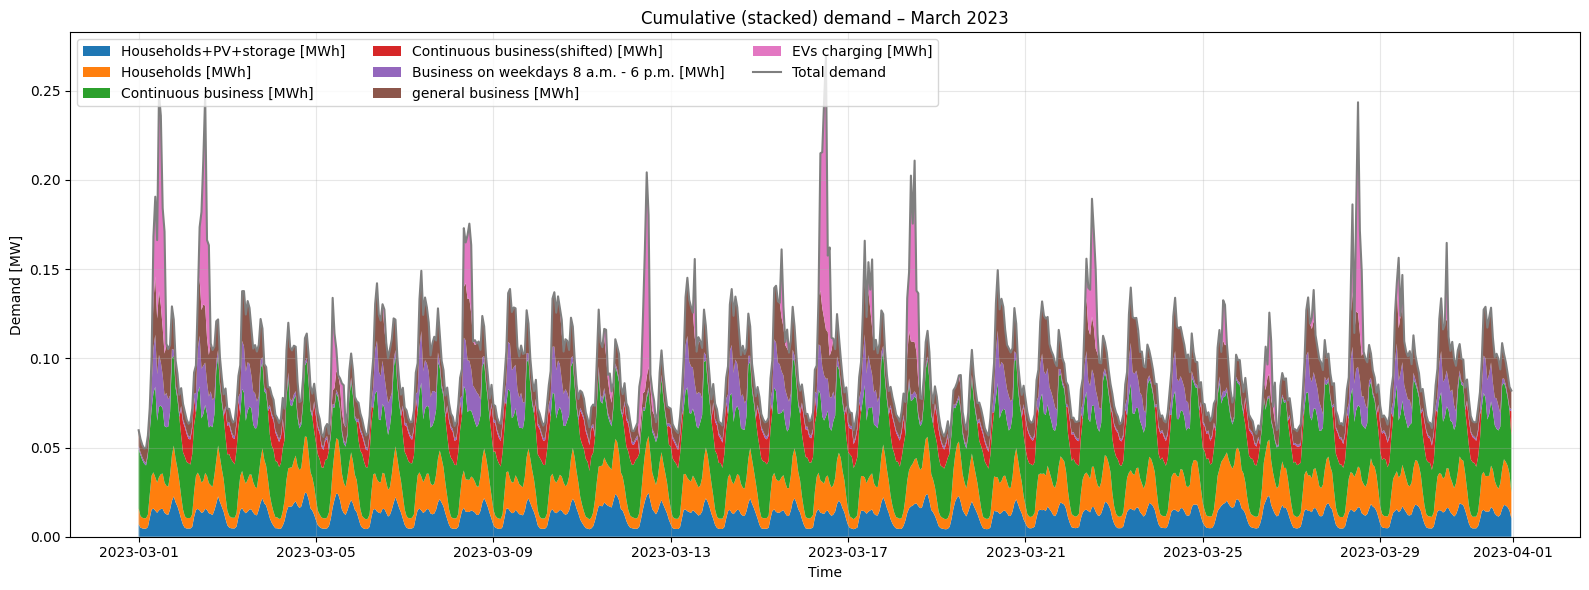

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")


df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"],
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"],
    "Continuous business [MWh]":  tot_flex_load_substracted["tot_demand_flex_load_variants_[MWh]"],
    "Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"],
    "Business on weekdays 8 a.m. - 6 p.m. [MWh]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"],
    "general business [MWh]":  tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"],
    "EVs charging [MWh]":         Tot_EVs_charging["EVs demand [MWh]"],
}).reindex(snapshots).fillna(0).astype(float)

plt.figure(figsize=(16, 6))
plt.stackplot(df_Tot_demand.index, *(df_Tot_demand[col].values for col in df_Tot_demand.columns), labels=df_Tot_demand.columns)


total = df_Tot_demand.sum(axis=1)
plt.plot(df_Tot_demand.index, total, linewidth=1.5, label="Total demand")

plt.title("Cumulative (stacked) demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Demand [MW]")
plt.legend(loc="upper left", ncol=3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


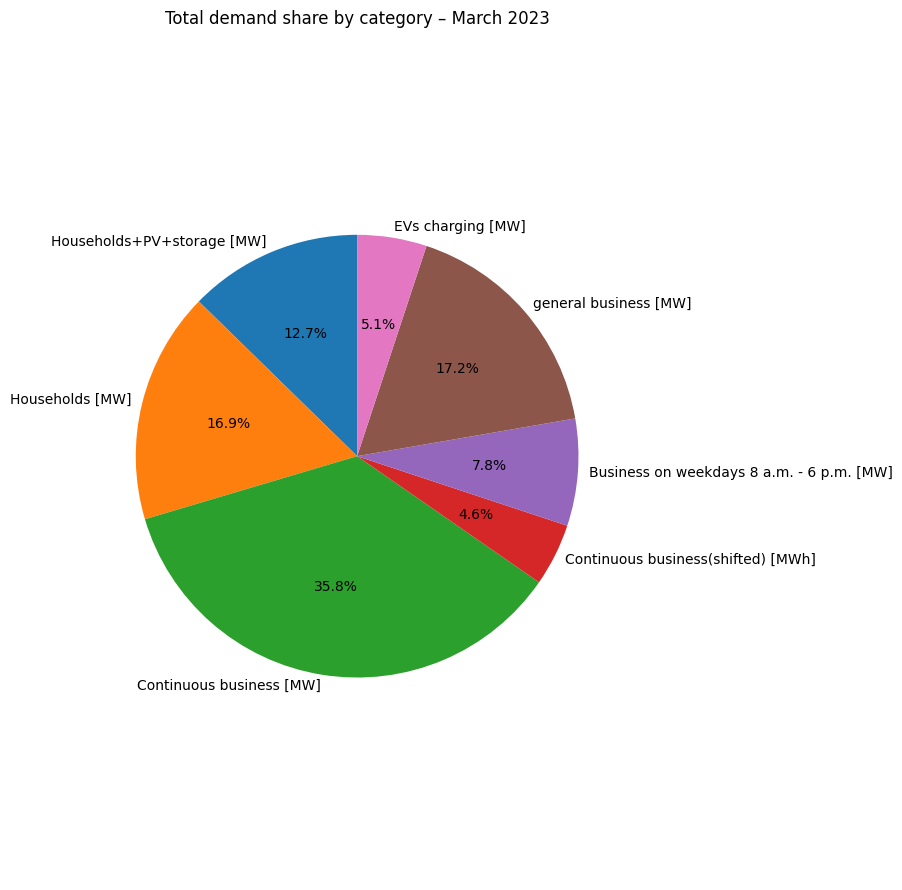

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")

series_map = {
    "Households+PV+storage [MW]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Households [MW]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Continuous business [MW]":   tot_flex_load_substracted["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Business on weekdays 8 a.m. - 6 p.m. [MW]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "general business [MW]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "EVs charging [MW]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots).fillna(0),
}

totals = pd.Series({k: v.sum() for k, v in series_map.items()})

plt.figure(figsize=(9, 9))
plt.pie(
    totals.values,
    labels=totals.index,
    autopct="%1.1f%%",     # percentages only
    startangle=90,
    pctdistance=0.60,      # move % closer to center
    labeldistance=1.05     # move labels slightly out
)
plt.axis("equal")
plt.title("Total demand share by category – March 2023")
plt.tight_layout()
plt.show()


In [34]:
df_rated_biomass = pd.DataFrame(
    0.06,
    index=snapshots,
    columns=["power[MW]"]
)

df_rated_solar = pd.DataFrame(
    solar_gen["power[W]"].values,
    index=snapshots,
    columns=["power[MW]"]
)


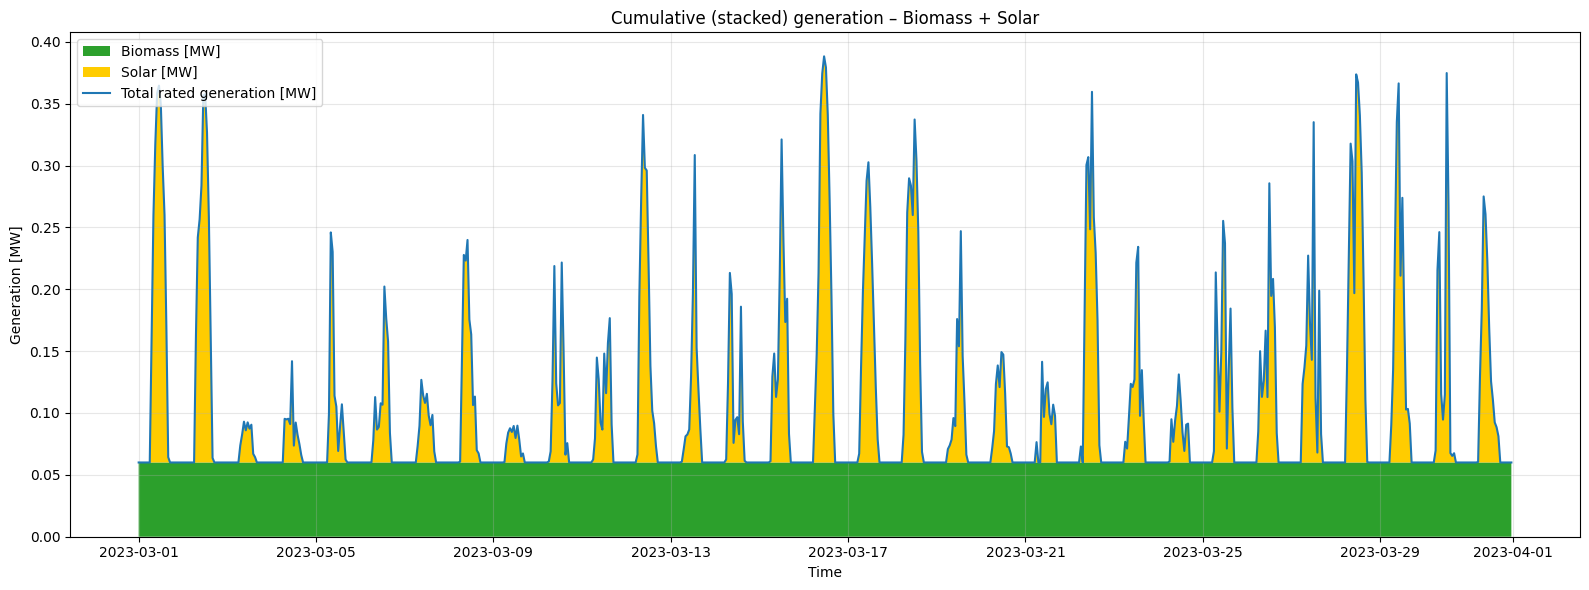

In [35]:
import matplotlib.pyplot as plt
import pandas as pd


df_dispatched_solar = net.generators_t.p["solar"]



df_rated_gen = pd.DataFrame({
    "Biomass [MW]": df_rated_biomass["power[MW]"],
    "Solar [MW]": df_rated_solar["power[MW]"]
})

plt.figure(figsize=(16, 6))
plt.stackplot(
    df_rated_gen.index,
    df_rated_gen["Biomass [MW]"].values,
    df_rated_gen["Solar [MW]"].values,
    labels=["Biomass [MW]", "Solar [MW]"],
    colors=["#2ca02c", "#ffcc00"]
)

total_gen = df_rated_gen.sum(axis=1)
plt.plot(df_rated_gen.index, total_gen, linewidth=1.5, label="Total rated generation [MW]")

plt.title("Cumulative (stacked) generation – Biomass + Solar")
plt.xlabel("Time")
plt.ylabel("Generation [MW]")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



# Discharging for 15 EVs

In [36]:
'''discharging_links = [f"EV{i+1}_discharge" for i in range(15)]
discharging_df = net.links_t.p0[discharging_links].copy()
discharging_df["total_discharging"] = discharging_df.sum(axis=1)
display(charging_df["total_charging"].sum())
display(discharging_df["total_discharging"].sum())'''

'discharging_links = [f"EV{i+1}_discharge" for i in range(15)]\ndischarging_df = net.links_t.p0[discharging_links].copy()\ndischarging_df["total_discharging"] = discharging_df.sum(axis=1)\ndisplay(charging_df["total_charging"].sum())\ndisplay(discharging_df["total_discharging"].sum())'

In [37]:
import matplotlib.pyplot as plt

'''fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(tou_price, color='tab:blue', label="Electricity Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Electricity Price [€/MWh]", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(discharging_df, color='tab:orange', label="Discharging Power")
ax2.set_ylabel("Discharging Power [kW or MW]", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Electricity Price and EV Discharging – March")
fig.tight_layout()
plt.grid(True)
plt.show()

#display(discharging_df.sum())
#display(charging_df.sum())'''

'fig, ax1 = plt.subplots(figsize=(12, 5))\n\nax1.plot(tou_price, color=\'tab:blue\', label="Electricity Price")\nax1.set_xlabel("Time")\nax1.set_ylabel("Electricity Price [€/MWh]", color=\'tab:blue\')\nax1.tick_params(axis=\'y\', labelcolor=\'tab:blue\')\n\nax2 = ax1.twinx()\nax2.plot(discharging_df, color=\'tab:orange\', label="Discharging Power")\nax2.set_ylabel("Discharging Power [kW or MW]", color=\'tab:orange\')\nax2.tick_params(axis=\'y\', labelcolor=\'tab:orange\')\n\nplt.title("Electricity Price and EV Discharging – March")\nfig.tight_layout()\nplt.grid(True)\nplt.show()\n\n#display(discharging_df.sum())\n#display(charging_df.sum())'

In [38]:
'''df_ch_dis = pd.DataFrame({
   
    "demand": df_EVs["power_consumption1_kW"]/1000,
    "avai": df_EVs["availability1"],
    #"EV1_char": net.links_t.p0["EV4_charge"],
    #"EV5_dis": net.links_t.p0["EV5_discharge"],
    "EV5_SOC": net.stores_t.e["EV1_store"]
    
    
}, index=net.snapshots)

df_ch_dis.iloc[50:100]'''



'df_ch_dis = pd.DataFrame({\n   \n    "demand": df_EVs["power_consumption1_kW"]/1000,\n    "avai": df_EVs["availability1"],\n    #"EV1_char": net.links_t.p0["EV4_charge"],\n    #"EV5_dis": net.links_t.p0["EV5_discharge"],\n    "EV5_SOC": net.stores_t.e["EV1_store"]\n    \n    \n}, index=net.snapshots)\n\ndf_ch_dis.iloc[50:100]'

In [39]:
#df_EVs["power_consumption1_kW"].sum()+df_EVs["power_consumption2_kW"].sum()+df_EVs["power_consumption3_kW"].sum()+df_EVs["power_consumption4_kW"].sum()+df_EVs["power_consumption5_kW"].sum()


In [40]:
display(net.generators_t.p["grid_generator"].sum())
display(net.generators_t.p["solar"].sum())
display(net.generators_t.p["Biomass"].sum())

np.float64(5.5446400977916905)

np.float64(30.795616749483877)

np.float64(36.930769712912294)

In [41]:
display(Tot_demand.sum())
display(solar_gen["power[W]"].sum())
display(df_rated_biomass["power[MW]"].sum())

np.float64(73.27102656018721)

np.float64(30.89586)

np.float64(44.640000000000015)

In [42]:
charging_df["total_charging"].sum()+ Charging_df["total_Charging"].sum() + CHarging_df["total_CHarging"].sum()

np.float64(3.71750367339083)

In [43]:
g=net.generators_t.p["grid_generator"].loc["2023-03-01 14:00:00"]
b= net.generators_t.p["Biomass"].loc["2023-03-01 14:00:00"]
s= net.generators_t.p["solar"].loc["2023-03-01 14:00:00"]
display(g)
display(b)
display(s)

np.float64(0.0)

np.float64(0.0)

np.float64(0.199972)

In [44]:
solar_gen.sum()

power[W]    30.89586
dtype: float64

In [45]:
Tot_demand.sum()               # 30.89 from solar deswegen ~ 45 must be covered by Biomass: 45/744=~ 0.06

np.float64(73.27102656018721)

In [46]:
net.generators_t.p["Biomass"].sum()

np.float64(36.930769712912294)

In [47]:
net.generators_t.p["grid_generator"].sum()

np.float64(5.5446400977916905)

In [48]:
charging_df["total_charging"].loc["2023-03-06 13:00:00"]#+Charging_df["total_Charging"].loc["2023-03-06 13:00:00"]+CHarging_df["total_CHarging"].loc["2023-03-06 13:00:00"]

np.float64(0.0)

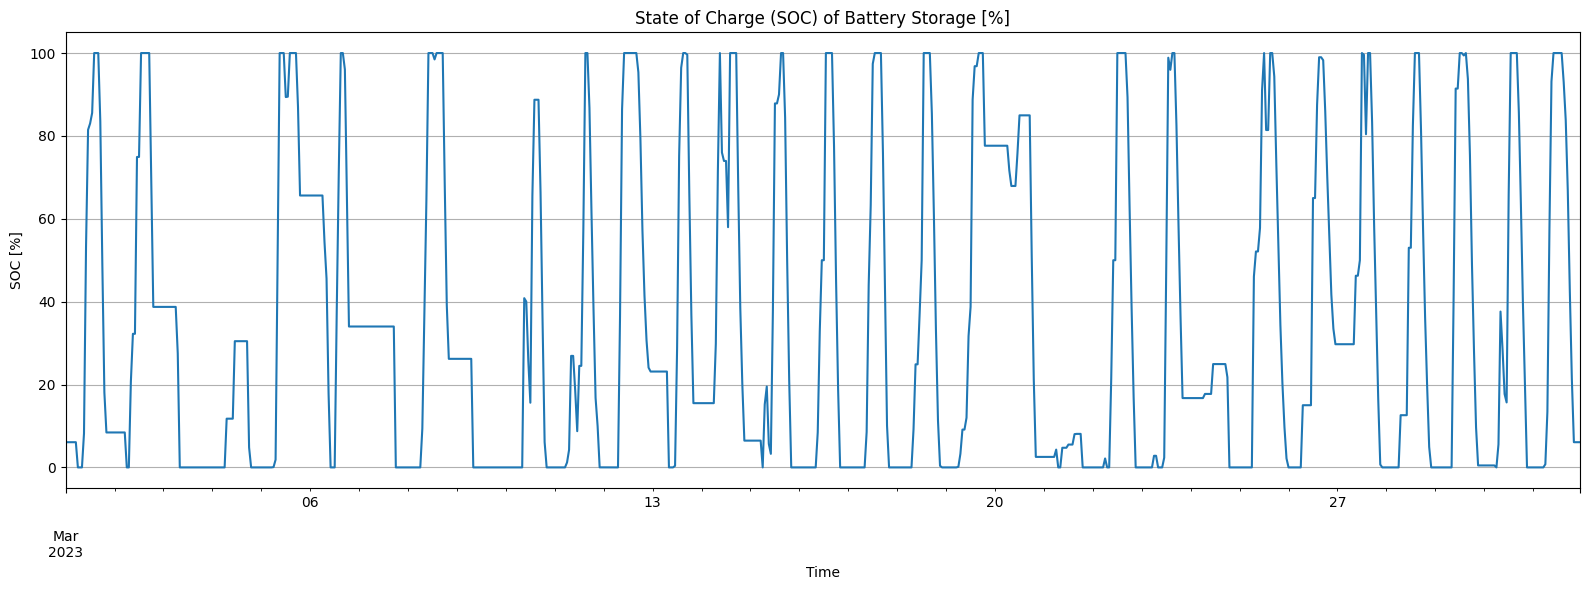

In [49]:
battery_capacity_mwh = net.stores.loc["battery_storage", "e_nom"]

# SOC in percentage
soc_percent = net.stores_t.e["battery_storage"] / battery_capacity_mwh * 100

# Plot
plt.figure(figsize=(16, 6))
soc_percent.plot()
plt.title("State of Charge (SOC) of Battery Storage [%]")
plt.ylabel("SOC [%]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

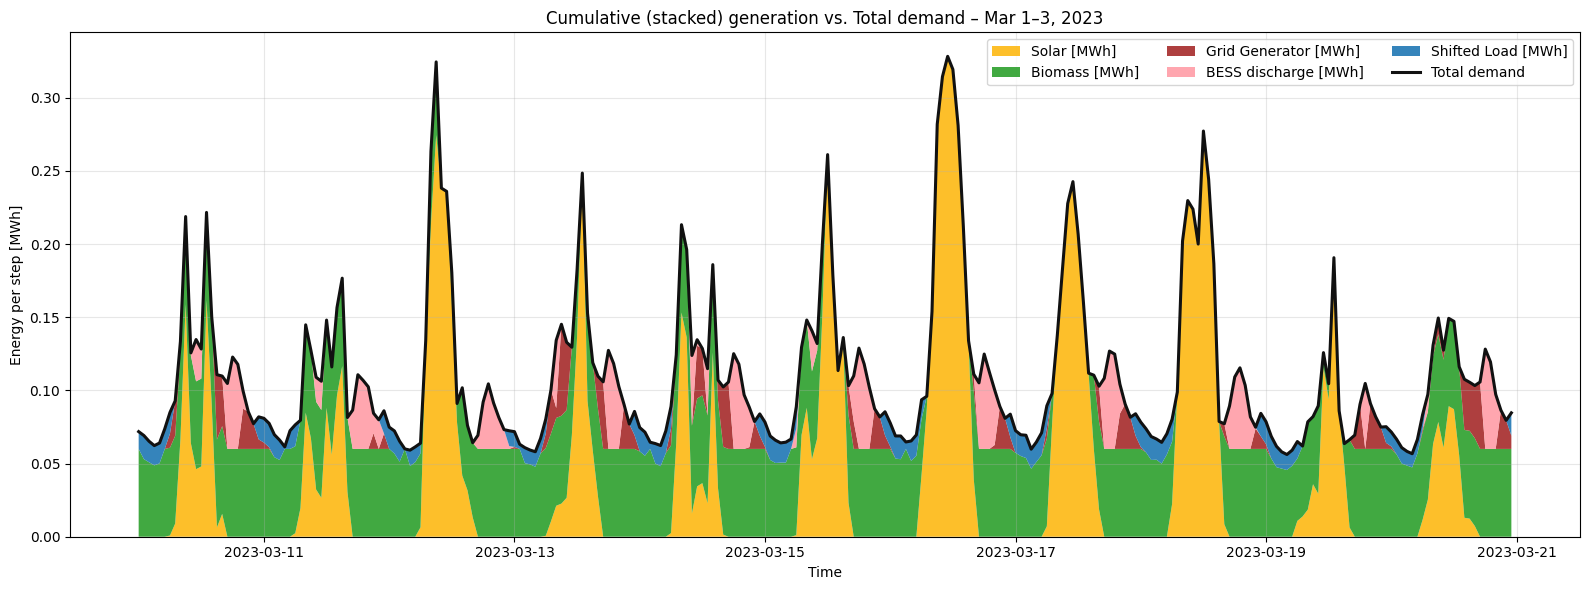

In [50]:
snapshots = pd.date_range("2023-03-10 00:00", "2023-03-20 23:00", freq="h")

solar   = net.generators_t.p["solar"].reindex(snapshots).fillna(0).astype(float)
biomass = net.generators_t.p["Biomass"].reindex(snapshots).fillna(0).astype(float)
grid    = net.generators_t.p["grid_generator"].reindex(snapshots).fillna(0).astype(float)
#EVs_discharge  = discharging_df["total_discharging"].reindex(snapshots).fillna(0)


store_p = net.stores_t.p["battery_storage"].reindex(snapshots).fillna(0).astype(float)
bess_discharge = store_p.clip(lower=0)          # to generation
batt_charging  = (-store_p).clip(lower=0)  # to demand

Store_p = net.stores_t.p["Store DSM"].reindex(snapshots).fillna(0).astype(float)
Bess_discharge = Store_p.clip(lower=0)          # to generation
Batt_charging  = (-Store_p).clip(lower=0) 

df_gen_stack = pd.DataFrame({
    "Solar [MWh]":          solar,
    "Biomass [MWh]":        biomass,
    "Grid Generator [MWh]": grid,
    "BESS discharge [MWh]": bess_discharge,
    "Shifted Load [MWh]": Bess_discharge,
    #"V2G [MWh]" : EVs_discharge
}).astype(float)

df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots),
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots),
    "Continuous business [MWh]":   tot_flex_load_substracted["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Business 8–18 [MWh]":         tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots),
    "General business [MWh]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots),
    "EVs charging [MWh]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots),
    "Central Battery charging [MWh]":      batt_charging,
    "Battery charging DSM [MWh]":      Batt_charging,
}).fillna(0).astype(float)

total_demand = df_Tot_demand.sum(axis=1)


gen_colors = {
    "Solar [MWh]":          "#FDB813",   # sunny yellow
    "Biomass [MWh]":        "#2CA02C",   # warm orange
    "Grid Generator [MWh]": "#A52A2A",   # green
    "BESS discharge [MWh]": "#FF9DA6",# red
    "Shifted Load [MWh]": "#1f77b4",
    #"V2G [MWh]": "#0000FF",
}
cols = list(df_gen_stack.columns)
plt.figure(figsize=(16,6))
plt.stackplot(
    df_gen_stack.index,
    *(df_gen_stack[c].values for c in cols),
    labels=cols,
    colors=[gen_colors[c] for c in cols],
    alpha=0.9,
)
plt.plot(total_demand.index, total_demand, color="#111111", lw=2.2, label="Total demand")
plt.legend(loc="upper left", ncol=3); plt.grid(True, alpha=0.3)


plt.title("Cumulative (stacked) generation vs. Total demand – Mar 1–3, 2023")
plt.xlabel("Time"); plt.ylabel("Energy per step [MWh]")
plt.legend(loc="upper right", ncol=3); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


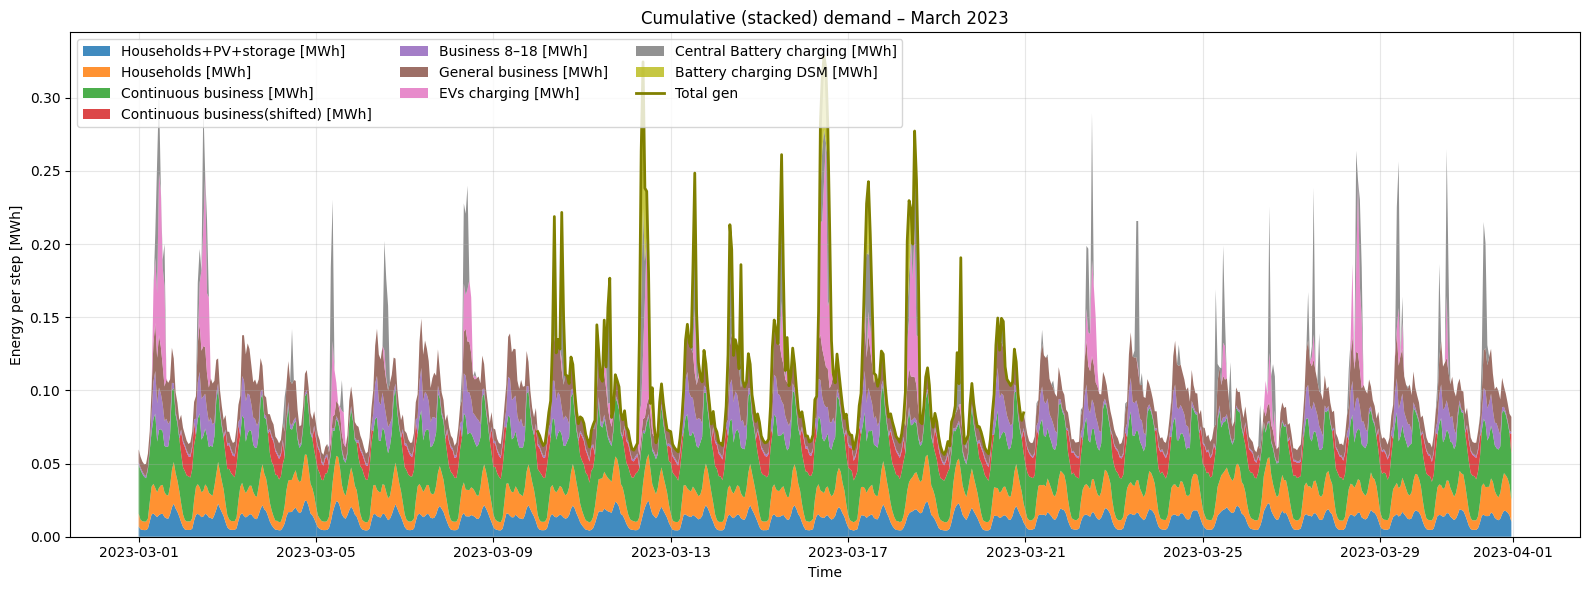

In [51]:
snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")

solar   = net.generators_t.p["solar"].reindex(snapshots).fillna(0).astype(float)
biomass = net.generators_t.p["Biomass"].reindex(snapshots).fillna(0).astype(float)
grid    = net.generators_t.p["grid_generator"].reindex(snapshots).fillna(0).astype(float)
#EVs_discharge  = discharging_df["total_discharging"].reindex(snapshots).fillna(0)

store_p = net.stores_t.p["battery_storage"].reindex(snapshots).fillna(0).astype(float)
bess_discharge = store_p.clip(lower=0)
batt_charging  = (-store_p).clip(lower=0)

total_gen = (solar + biomass + grid + bess_discharge+ Bess_discharge).astype(float)
df_total_generation = pd.DataFrame({"Total Generation [MWh]": total_gen})

df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots),
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots),
    "Continuous business [MWh]":   tot_flex_load_substracted["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Business 8–18 [MWh]":         tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots),
    "General business [MWh]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots),
    "EVs charging [MWh]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots),
    "Central Battery charging [MWh]":      batt_charging,
    "Battery charging DSM [MWh]":      Batt_charging,
}).fillna(0).astype(float)

plt.figure(figsize=(16, 6))
plt.stackplot(df_Tot_demand.index,
              *(df_Tot_demand[c].values for c in df_Tot_demand.columns),
              labels=df_Tot_demand.columns, alpha=0.85)

plt.plot(df_total_generation.index,
         df_total_generation["Total Generation [MWh]"],
         linewidth=2, label="Total gen", color="olive")

plt.title("Cumulative (stacked) demand – March 2023")
plt.xlabel("Time"); plt.ylabel("Energy per step [MWh]")
plt.legend(loc="upper left", ncol=3); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


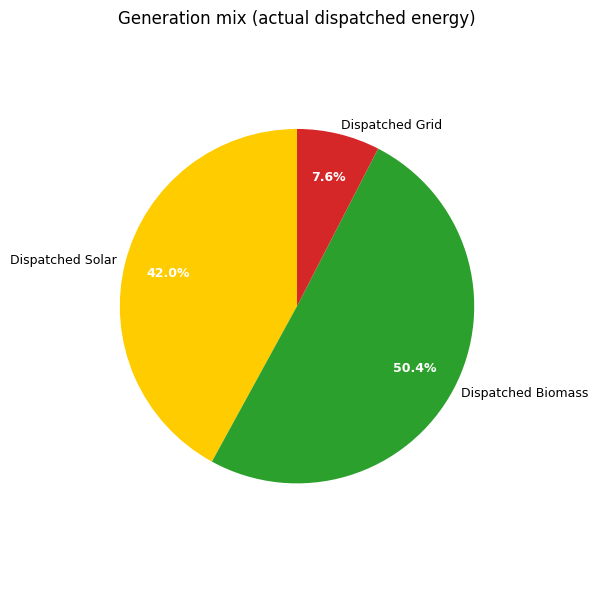

In [52]:
import matplotlib.pyplot as plt

# --- Supply breakdown (totals over the window; 1-hour steps ≈ MWh) ---
right_solar   = net.generators_t.p["solar"].sum()
right_biomass = net.generators_t.p["Biomass"].sum()
right_grid    = net.generators_t.p["grid_generator"].sum()

right_labels = ["Dispatched Solar", "Dispatched Biomass", "Dispatched Grid"]
right_sizes  = [right_solar, right_biomass, right_grid]
right_colors = ["#ffcc00", "#2ca02c", "#d62728"]  # yellow, green, red

# drop zero slices to avoid clutter
labels, sizes, colors = zip(*[(L,S,C) for L,S,C in zip(right_labels, right_sizes, right_colors) if S > 0])

# --- Plot single pie ---
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct="%1.1f%%", startangle=90, pctdistance=0.75, labeldistance=1.05
)
ax.axis("equal")
ax.set_title("Generation mix (actual dispatched energy)")

# styling
for t in autotexts:
    t.set_color("white"); t.set_fontweight("bold"); t.set_fontsize(9)
for t in texts:
    t.set_fontsize(9)

plt.tight_layout()
plt.show()


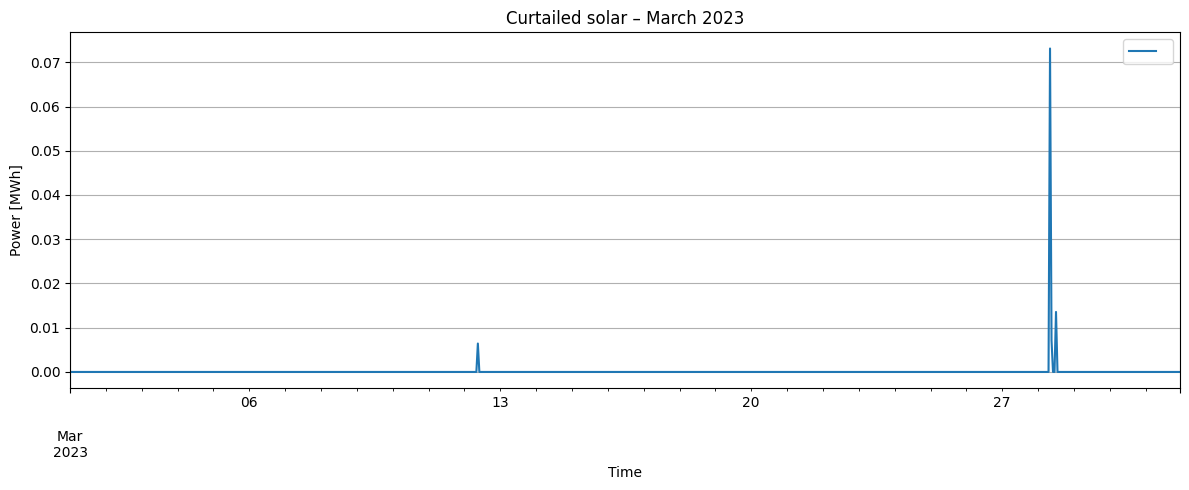

In [53]:
start1= "2023-03-01 00:00:00"
end1 =  "2023-03-31 23:00:00"
solar_Curtailment=(solar_gen["power[W]"]-net.generators_t.p["solar"])

plt.figure(figsize=(12, 5))
solar_Curtailment.loc[start1:end1].plot(legend=True)
plt.title("Curtailed solar – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

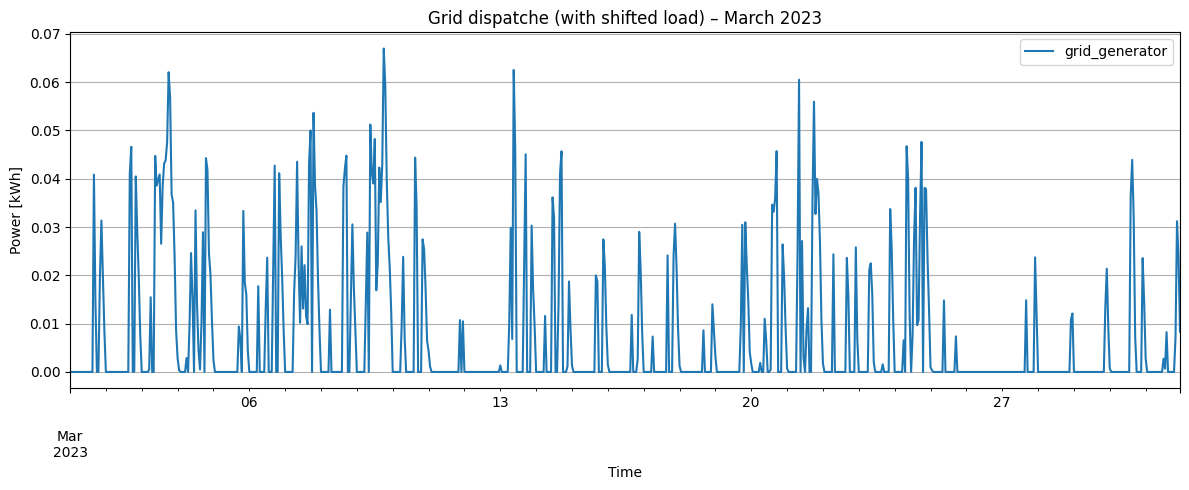

In [54]:
plt.figure(figsize=(12, 5))
net.generators_t.p["grid_generator"].loc[start1:end1].plot(legend=True)
plt.title("Grid dispatche (with shifted load) – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'total Flex Load'}>

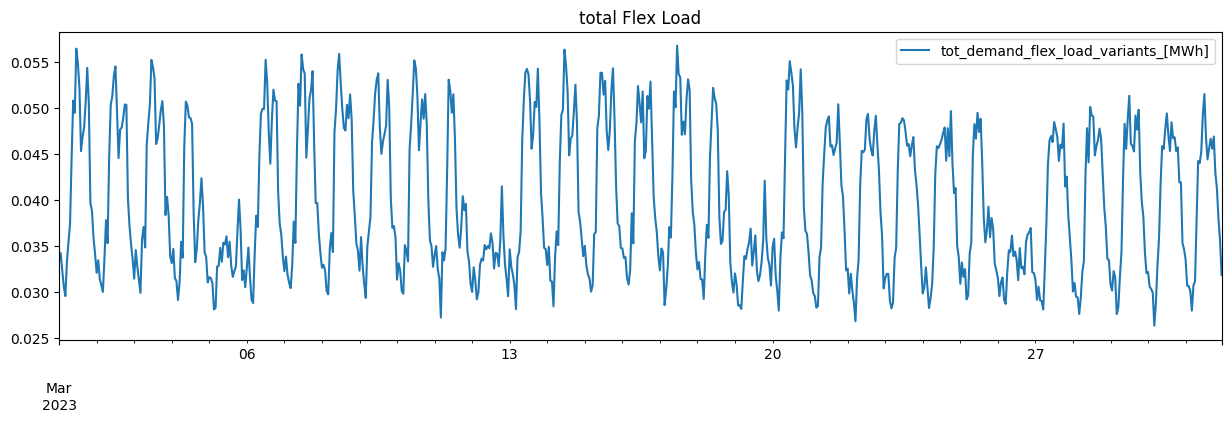

In [55]:
tot_flex_load.loc[start1:end1].plot(figsize=(15, 4), title="total Flex Load")

<Axes: title={'center': 'new total Flex Load'}, xlabel='snapshot'>

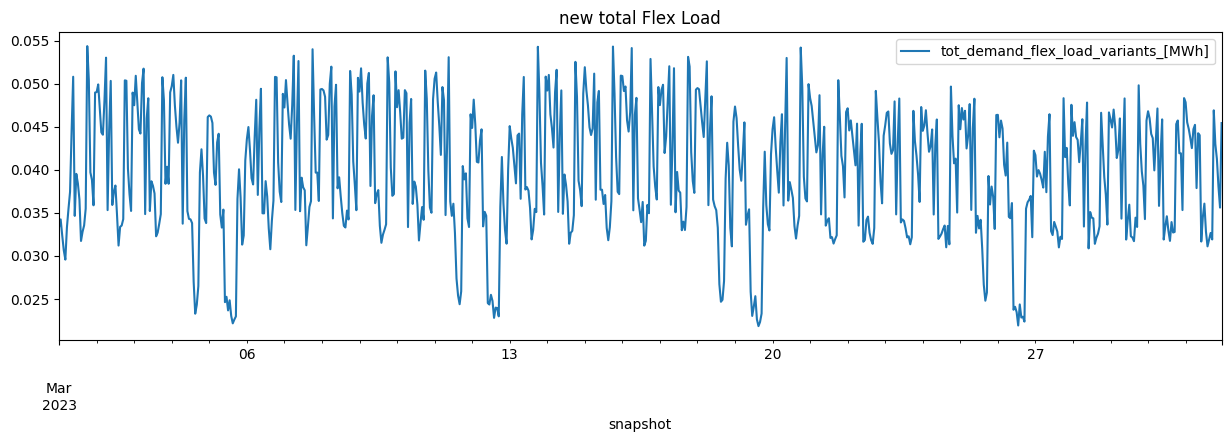

In [56]:
new_tot_flex_load = tot_flex_load_substracted + df_shifted_load_target
new_tot_flex_load.loc[start1:end1].plot(figsize=(15, 4), title="new total Flex Load")

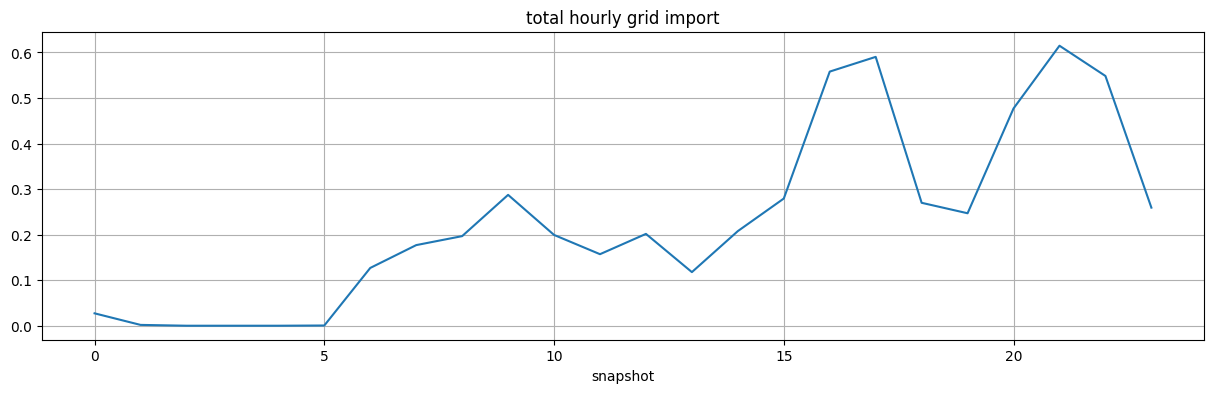

In [57]:
tot_hourly_grid_import= net.generators_t.p["grid_generator"].groupby(net.generators_t.p["grid_generator"].index.hour).sum()
tot_hourly_grid_import.plot(figsize=(15, 4), title="total hourly grid import")
plt.grid(True)

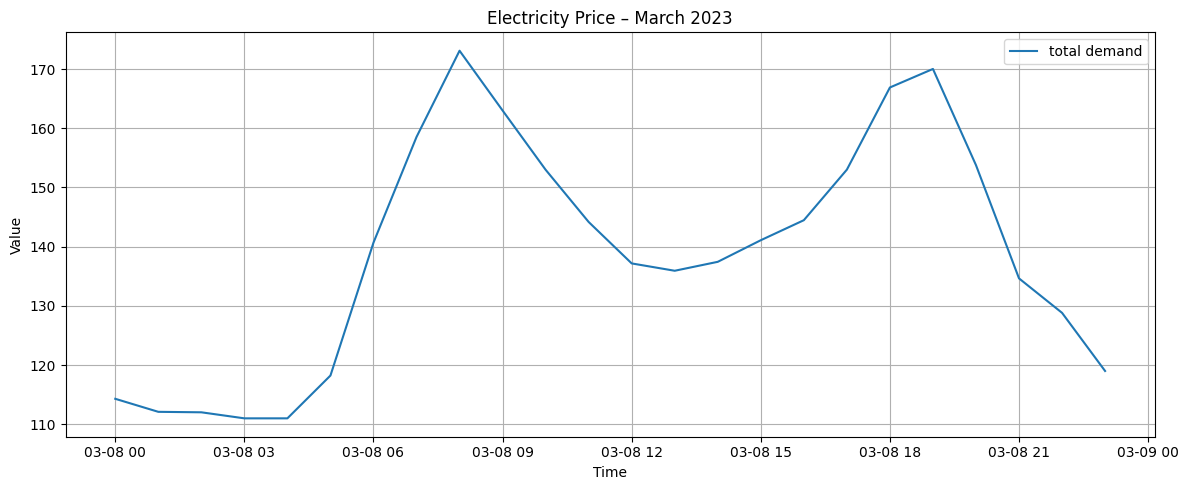

E_price    102.518454
dtype: float64

In [58]:
Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1

start="2023-03-08 00:00:00"
end = "2023-03-08 23:00:00"    
plt.figure(figsize=(12, 5))
plt.plot(tou_price.loc[start:end],  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.mean()

In [59]:
hourly_sum = net.generators_t.p["grid_generator"].groupby(net.generators_t.p["grid_generator"].index.hour).sum()
rolling_sum = hourly_sum.rolling(window=3).sum()

peak_start_hour = rolling_sum.idxmax()
peak_hours = list(range(peak_start_hour-2, peak_start_hour+1))

print("Top 3-hour peak import window:", peak_hours)

Top 3-hour peak import window: [20, 21, 22]


In [60]:
'''index = pd.date_range("2023-03-01", "2023-03-31 23:00", freq="h")
shift_hours = peak_hours
df_shifted_load = pd.Series(0.0, index=index, name="DSM_shift_20%")
df_shifted_load.loc[df_shifted_load.index.hour.isin(shift_hours)] = (
    tot_flex_load["tot_demand_flex_load_variants_[MWh]"].loc[tot_flex_load.index.hour.isin(shift_hours)] * 0.3
)'''

'index = pd.date_range("2023-03-01", "2023-03-31 23:00", freq="h")\nshift_hours = peak_hours\ndf_shifted_load = pd.Series(0.0, index=index, name="DSM_shift_20%")\ndf_shifted_load.loc[df_shifted_load.index.hour.isin(shift_hours)] = (\n    tot_flex_load["tot_demand_flex_load_variants_[MWh]"].loc[tot_flex_load.index.hour.isin(shift_hours)] * 0.3\n)'

In [61]:
'''tot_flex_load_substracted =  tot_flex_load["tot_demand_flex_load_variants_[MWh]"]- df_shifted_load'''

'tot_flex_load_substracted =  tot_flex_load["tot_demand_flex_load_variants_[MWh]"]- df_shifted_load'

<Axes: title={'center': 'total Flex Load substracted'}, xlabel='snapshot'>

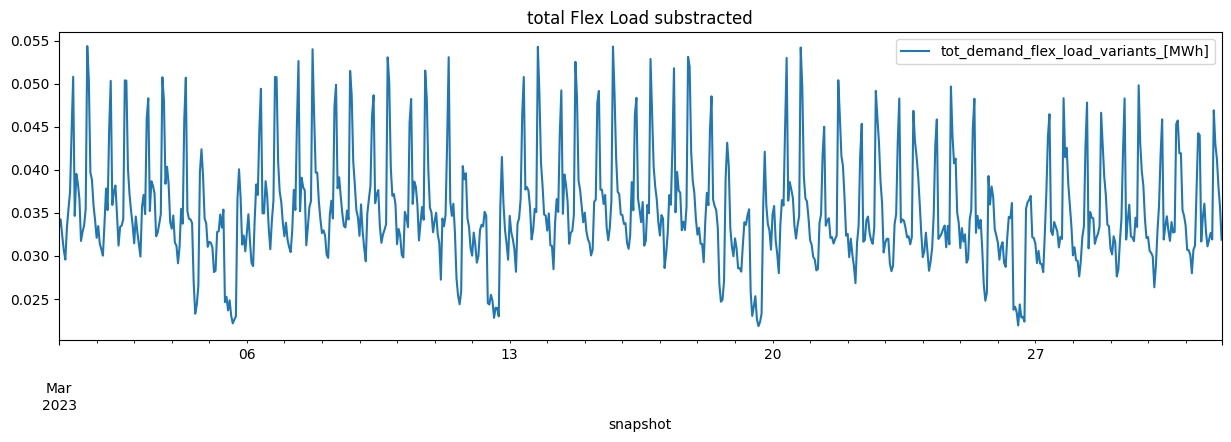

In [62]:
tot_flex_load_substracted.plot(figsize=(15, 4), title="total Flex Load substracted")

In [63]:
# Re-import after kernel reset
'''import pandas as pd


# Define full time range
start1 = "2023-03-01 00:00:00"
end1 = "2023-03-31 23:00:00"
grid_import_series = net.generators_t.p["grid_generator"].loc[start1:end1]

# Function to find the 3-hour window with highest grid import per day
def find_peak_window(day_data, window_size=3):
    rolling_sum = day_data.rolling(window=window_size).sum()
    peak_start = rolling_sum.idxmax()
    return pd.date_range(peak_start, periods=window_size, freq="h")

# Run for each day
results = []

for date, group in grid_import_series.groupby(grid_import_series.index.date):
    peak_hours = find_peak_window(group)
    results.append(pd.DataFrame({
        "date": [date] * len(peak_hours),
        "peak_hour": peak_hours
    }))

peak_hours_df = pd.concat(results, ignore_index=True)
results'''


'import pandas as pd\n\n\n# Define full time range\nstart1 = "2023-03-01 00:00:00"\nend1 = "2023-03-31 23:00:00"\ngrid_import_series = net.generators_t.p["grid_generator"].loc[start1:end1]\n\n# Function to find the 3-hour window with highest grid import per day\ndef find_peak_window(day_data, window_size=3):\n    rolling_sum = day_data.rolling(window=window_size).sum()\n    peak_start = rolling_sum.idxmax()\n    return pd.date_range(peak_start, periods=window_size, freq="h")\n\n# Run for each day\nresults = []\n\nfor date, group in grid_import_series.groupby(grid_import_series.index.date):\n    peak_hours = find_peak_window(group)\n    results.append(pd.DataFrame({\n        "date": [date] * len(peak_hours),\n        "peak_hour": peak_hours\n    }))\n\npeak_hours_df = pd.concat(results, ignore_index=True)\nresults'

# bus and loads are definiert(you need just define store in the bus DSM for df_shifted_load)

In [64]:
df_shifted_load.head(24)

,tot_demand_flex_load_variants_[MWh]
snapshot,
2023-03-01 00:00:00,0.000000
2023-03-01 01:00:00,0.000000
2023-03-01 02:00:00,0.000000
2023-03-01 03:00:00,0.000000
2023-03-01 04:00:00,0.000000
2023-03-01 05:00:00,0.000000
2023-03-01 06:00:00,0.000000
2023-03-01 07:00:00,0.000000
2023-03-01 08:00:00,0.000000


In [65]:
solar_Curtailment.max()

0.07311064440340001

In [66]:
df_shifted_load_target.sum()

tot_demand_flex_load_variants_[MWh]    3.343891
dtype: float64

In [67]:
df_shifted_load.sum()

tot_demand_flex_load_variants_[MWh]    3.442856
dtype: float64

# Locational Marginal Prices at each buses

In [68]:
net.buses_t.marginal_price.iloc[170:180]


Bus,grid,solar_bus,demand_Gewerbe,houshold,houshold_pv_storage,Landswirtschaftsbetriebe,battery_bus,flex_load,Biomass,DSM,...,vw_id7_3_bus,vw_id7_4_bus,bmw_i4_m50_1_bus,bmw_i4_m50_2_bus,bmw_i4_m50_3_bus,bmw_i4_m50_4_bus,benz_eqe_300_1_bus,benz_eqe_300_2_bus,benz_eqe_300_3_bus,benz_eqe_300_4_bus
snapshot,,,,,,,,,,,,,,,,,,,,,
2023-03-08 02:00:00,112.02,161.97,100.05,100.05,100.05,100.05,261.98,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 03:00:00,111.00,161.97,100.05,100.05,100.05,100.05,261.98,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 04:00:00,111.00,161.97,100.05,100.05,100.05,100.05,261.98,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 05:00:00,118.23,161.97,100.05,100.05,100.05,100.05,261.98,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 06:00:00,140.68,240.68,340.68,340.68,340.68,340.68,240.65,340.68,240.68,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 07:00:00,158.53,0.05,100.05,100.05,100.05,100.05,100.06,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 08:00:00,173.10,0.05,100.05,100.05,100.05,100.05,100.06,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 09:00:00,163.00,0.05,100.05,100.05,100.05,100.05,100.06,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05
2023-03-08 10:00:00,152.99,0.05,100.05,100.05,100.05,100.05,100.06,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.05,100.05,100.05,100.05,100.05


In [70]:
display(solar_gen["power[W]"].loc["2023-03-08 06:00:00"])
display(net.generators_t.p["solar"].loc["2023-03-08 06:00:00"])
display(net.generators_t.p["Biomass"].loc["2023-03-08 06:00:00"])
display(net.generators_t.p["grid_generator"].loc["2023-03-08 06:00:00"])
display(net.stores_t.p["battery_storage"].loc["2023-03-08 06:00:00"])     #  + discharge to loads
display(Tot_demand.loc["2023-03-08 06:00:00"])
display(net.stores_t.e["battery_storage"].loc["2023-03-08 06:00:00"])  # soc

np.float64(0.000672)

np.float64(0.000672)

np.float64(0.06)

np.float64(0.012890966258840002)

np.float64(0.0)

np.float64(0.0891422253188439)

np.float64(0.0)

# total charging cost of EVs

In [71]:
revenue_EV = (net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_charge"])+(net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_Charge"])+(net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_CHarge"])
revenue_EV.sum()

np.float64(23.658886603749636)

# Revenue Solar

In [72]:
revenue_solar = net.buses_t.marginal_price["solar_bus"]*net.generators_t.p["solar"]
revenue_solar.sum()

np.float64(830.0637607599999)

# cost flex Load

In [73]:
revenue_load = (net.buses_t.marginal_price["flex_load"]*tot_flex_load_substracted["tot_demand_flex_load_variants_[MWh]"])+(net.buses_t.marginal_price["DSM"]*df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"])
revenue_load.sum()


np.float64(5930.351125646352)

# cost Fixed load

In [74]:
Revenue_load = net.buses_t.marginal_price["houshold"]*tot_Houshold["tot_demand_Houshold_variants_[MWh]"]
Revenue_load.sum()

np.float64(2801.100661457277)

# Total system cost

In [75]:
total_cost = float(net.objective)
print(total_cost)

9030.940738779227


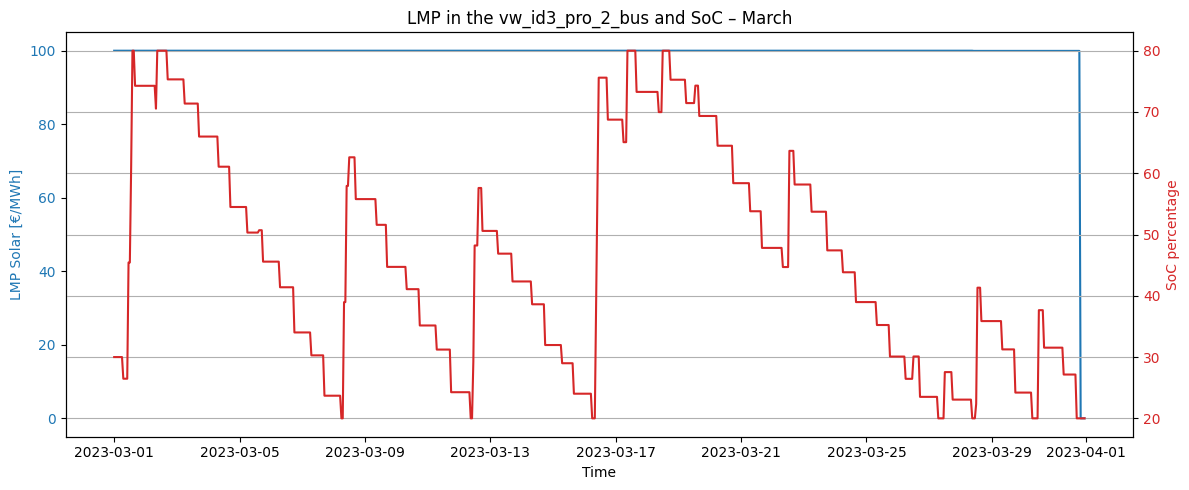

In [77]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))

# Left Y-axis: LMP Solar
ax1.plot(net.buses_t.marginal_price["vw_id3_pro_2_bus"], color='tab:blue', label="LMP Solar")
ax1.set_xlabel("Time")
ax1.set_ylabel("LMP Solar [€/MWh]", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ev_name = "vw_id3_pro (1)"
ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
store_id = f"{ev_id}_store"

battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
soc_percent = (net.stores_t.e[store_id] / battery_capacity) * 100
ax2 = ax1.twinx()
ax2.plot(soc_percent, color='tab:red', label="Grid Dispatch")
ax2.set_ylabel("SoC percentage", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title("LMP in the vw_id3_pro_2_bus and SoC – March")
fig.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
'''penalty = (grid_import - grid_import.min()) / (grid_import.max() - grid_import.min()) * 50

Stunde     grid_import    marginal_cost(Penalty)
00:00        40              33.3
05:00        70              50.0
19:00        15               0.0

# Flexibler Verbraucher (als Generator mit sign=-1)
network.add("Generator", "flex_load",
            bus="electricity",
            sign=-1,
            p_nom=4,
            marginal_cost=penalty,
            controllable=True)

# Energiemengen-Beschränkung:
# Die Summe des Verbrauchs über alle Stunden = 10 MWh
network.global_constraints.loc["energy_limit"] = [
    "Generator",           # applies to Generator objects
    "flex_load",           # applies to the flex_load
    "p",                   # apply to power (MW)
    "=",                   # equality constraint
    10                     # total MWh (über alle Stunden)
]'''

In [ ]:
'''snapshots = pd.date_range("2025-01-01", "2025-01-30 23:00", freq="H")
network = pypsa.Network()
network.set_snapshots(snapshots)
network.add("Bus", "electricity")

np.random.seed(0)
base_load = pd.Series(np.random.uniform(10, 20, len(snapshots)), index=snapshots)
# Angebotene Flexibilität: 30% der Last pro Stunde
shiftable = 0.3 * base_load

# Beispiel LFM-Vergütungssignal (negative Kosten = Vergütung)
lfm_price = pd.Series(0, index=snapshots)
lfm_price[snapshots.hour.isin([17,18,19])] = -20  # z. B. Vergütung bei Netzüberlastung

# Festlast = base_load minus maximal verschiebbare Last
fixed_load = base_load - shiftable

network.add("Load", "fixed_industry", bus="electricity", p_set=fixed_load)

network.add("Generator", "flex_industry",
            bus="electricity",
            sign=-1,
            p_nom=shiftable.max(), # max nach Stundenprofil
            p_max_pu=(shiftable / shiftable.max()),
            marginal_cost=lfm_price,
            controllable=True)

# Gesamtenergie bleibt gleich: keine need global constraint, da fixed + flex == base_load
# Ergänze Grid-Import & weitere Systemkomponenten'''